In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import acos, degrees
from scipy.signal import find_peaks
import os.path
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import entropy
import pylab as pl
from numpy.fft import fft
from scipy import stats
import numpy
from scipy import signal
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter
import matplotlib.patches as mpatches

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
chunk_width = 200
#centr_rang = 110

In [3]:
#Function to extract angle using 3 points coordinate
def angle3pt(a, b, c):
#    """Counterclockwise angle in degrees by turning from c to a around b
#        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(
    math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang


In [4]:
def getridofAngleJumps(alpha):
    alpha_rad = [x*(np.pi)/180 for x in alpha]
    alpha_rad = np.array(alpha_rad)
    alpha_rad[~np.isnan(alpha_rad)] = np.unwrap(alpha_rad[~np.isnan(alpha_rad)])
    alpha_unwrap= np.degrees(alpha_rad)
    return alpha_unwrap

In [5]:
def smooth_acausal(x,frequency = 0.300):
    #b, a = signal.butter(8, 0.150)
    sos = signal.butter(4, frequency, output='sos')
    y = signal.sosfiltfilt(sos, x)
    return y


In [6]:
def smooth(x,window_len=1,window='hanning'):
#    """smooth the data using a window with requested size.

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [7]:
#Function to extract RidgeX trajectory from excel file
def RidgeX_excel_to_array_preprocessed(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    RidgeX = pd.read_csv(file_path[trial_no])

    #take just numeric values
    RidgeX=pd.to_numeric(RidgeX.iloc[:,0])

 
    return smooth(RidgeX.values)


In [8]:
#Function to plot tail angle trajectory
def plot_TailAngle(file_path, chunk_width, i, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])
#    df = pd.read_csv(file_path)
    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000':'tail1_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.1':'tail1_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.2':'tail1_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.3':'tail2_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.4':'tail2_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.5':'tail2_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.6':'tail3_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.7':'tail3_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.8':'tail3_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.9':'tail4_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.10':'tail4_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.11':'tail4_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.12':'tail5_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.13':'tail5_y',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.14':'tail5_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.15':'tail6_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.16':'tail6_y',  
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.17':'tail6_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.18':'tail7_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.19':'tail7_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.20':'tail7_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.21':'tail8_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.22':'tail8_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.23':'tail8_lik'}, 
                 inplace=True)

    #take just numeric values
    df.tail1_x=pd.to_numeric(df.tail1_x[c-chunk_width:c+chunk_width])
    df.tail1_y=pd.to_numeric(df.tail1_y[c-chunk_width:c+chunk_width])
    df.tail1_lik=pd.to_numeric(df.tail1_lik[c-chunk_width:c+chunk_width])
    df.tail2_x=pd.to_numeric(df.tail2_x[c-chunk_width:c+chunk_width])
    df.tail2_y=pd.to_numeric(df.tail2_y[c-chunk_width:c+chunk_width])
    df.tail2_lik=pd.to_numeric(df.tail2_lik[c-chunk_width:c+chunk_width])
    df.tail3_x=pd.to_numeric(df.tail3_x[c-chunk_width:c+chunk_width])
    df.tail3_y=pd.to_numeric(df.tail3_y[c-chunk_width:c+chunk_width])
    df.tail3_lik=pd.to_numeric(df.tail3_lik[c-chunk_width:c+chunk_width])
    df.tail4_x=pd.to_numeric(df.tail4_x[c-chunk_width:c+chunk_width])
    df.tail4_y=pd.to_numeric(df.tail4_y[c-chunk_width:c+chunk_width])
    df.tail4_lik=pd.to_numeric(df.tail4_lik[c-chunk_width:c+chunk_width])
    df.tail5_x=pd.to_numeric(df.tail5_x[c-chunk_width:c+chunk_width])
    df.tail5_y=pd.to_numeric(df.tail5_y[c-chunk_width:c+chunk_width])
    df.tail5_lik=pd.to_numeric(df.tail5_lik[c-chunk_width:c+chunk_width])
    df.tail6_x=pd.to_numeric(df.tail6_x[c-chunk_width:c+chunk_width])
    df.tail6_y=pd.to_numeric(df.tail6_y[c-chunk_width:c+chunk_width])
    df.tail6_lik=pd.to_numeric(df.tail6_lik[c-chunk_width:c+chunk_width])
    df.tail7_x=pd.to_numeric(df.tail7_x[c-chunk_width:c+chunk_width])
    df.tail7_y=pd.to_numeric(df.tail7_y[c-chunk_width:c+chunk_width])
    df.tail7_lik=pd.to_numeric(df.tail7_lik[c-chunk_width:c+chunk_width])
    df.tail8_x=pd.to_numeric(df.tail8_x[c-chunk_width:c+chunk_width])
    df.tail8_y=pd.to_numeric(df.tail8_y[c-chunk_width:c+chunk_width])
    df.tail8_lik=pd.to_numeric(df.tail8_lik[c-chunk_width:c+chunk_width])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.05
    df.tail1_x.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail1_y.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_x.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_y.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_x.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_y.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_x.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_y.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_x.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_y.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_x.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_y.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_x.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_y.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_x.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_y.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)




    #Compute and plot tail angle in panda dataframe as last column
    angles1=[]
    angles2=[]
    angles3=[]
    angles4=[]
    angles5=[]
    angles6=[]
    angles7=[]

    for i in range(df.shape[0]):
        #x1,y1=df.tail1_x[i],df.tail1_y[i]
        vertical = np.array([df.tail1_x[i],df.tail1_y[i]+10])
        tail1 = np.array([df.tail1_x[i],df.tail1_y[i]])
        tail2 = np.array([df.tail2_x[i],df.tail2_y[i]])    
        tail3 = np.array([df.tail3_x[i],df.tail3_y[i]])
        tail4 = np.array([df.tail4_x[i],df.tail4_y[i]])
        tail5 = np.array([df.tail5_x[i],df.tail5_y[i]])    
        tail6 = np.array([df.tail6_x[i],df.tail6_y[i]])
        tail7 = np.array([df.tail7_x[i],df.tail7_y[i]])
        tail8 = np.array([df.tail8_x[i],df.tail8_y[i]])    

    #Change below to decide 3 points to determine angle
        angle1 = angle3pt(tail2, tail1, vertical)
        angle2 = angle3pt(tail3, tail1, vertical)
        angle3 = angle3pt(tail4, tail1, vertical)
        angle4 = angle3pt(tail5, tail1, vertical)
        angle5 = angle3pt(tail6, tail1, vertical)
        angle6 = angle3pt(tail7, tail1, vertical)
        angle7 = angle3pt(tail8, tail1, vertical)
        
        #Append
        angles1.append(round(angle1,2))
        angles2.append(round(angle2,2))
        angles3.append(round(angle3,2))
        angles4.append(round(angle4,2))
        angles5.append(round(angle5,2))
        angles6.append(round(angle6,2))
        angles7.append(round(angle7,2))

    df['Angles1']=angles1
    df.head()
    df['Angles2']=angles2
    df.head()
    df['Angles3']=angles3
    df.head()
    df['Angles4']=angles4
    df.head()
    df['Angles5']=angles5
    df.head()
    df['Angles6']=angles6
    df.head()
    df['Angles7']=angles7
    df.head()
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha1 = df.Angles1
    alpha2 = df.Angles2
    alpha3 = df.Angles3
    alpha4 = df.Angles4
    alpha5 = df.Angles5
    alpha6 = df.Angles6
    alpha7 = df.Angles7

    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha1 = smooth(getridofAngleJumps(alpha1))
    alpha2 = smooth(getridofAngleJumps(alpha2))
    alpha3 = smooth(getridofAngleJumps(alpha3))
    alpha4 = smooth(getridofAngleJumps(alpha4))
    alpha5 = smooth(getridofAngleJumps(alpha5))
    alpha6 = smooth(getridofAngleJumps(alpha6))
    alpha7 = smooth(getridofAngleJumps(alpha7))

    return alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7

In [9]:
#Function to plot Right Paw angle trajectory
def plot_PawAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RA_x[i],df.RA_y[i]+10])
        RA = np.array([df.RA_x[i],df.RA_y[i]])
        RP = np.array([df.RP_x[i],df.RP_y[i]])

        angle = angle3pt(RP, RA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)
#    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
#    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
#    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

#!    return [TailAngle_traj, alpha]
    return [alpha, smooth(RP_x), smooth(LP_x)]

In [10]:
# #Function to plot Right Paw angle trajectory
# def plot_LPAngle(file_path, chunk_width, trial_no):
#     #Read csv file tail markers
#     df = pd.read_csv(file_path[trial_no])
# #    df = pd.read_csv(file_path)

#     #Rename marker columns
#     df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_200000.9':'LP_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.10':'LP_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.11':'LP_lik',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.12':'LA_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.13':'LA_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.14':'LA_lik',
                       
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.24':'RA_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.25':'RA_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.26':'RA_lik',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.21':'RP_x',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.22':'RP_y',
#                           'DLC_resnet50_Ridge_walkMay27shuffle1_200000.23':'RP_lik'}, 
#                  inplace=True)

#     #take just numeric values
#     df.RA_x=pd.to_numeric(df.RA_x[2:])
#     df.LA_x=pd.to_numeric(df.LA_x[2:])

#     df.RA_y=pd.to_numeric(df.RA_y[2:])
#     df.LA_y=pd.to_numeric(df.LA_y[2:])

#     df.RP_x=pd.to_numeric(df.RP_x[2:])
#     df.RP_y=pd.to_numeric(df.RP_y[2:])
#     df.LP_x=pd.to_numeric(df.LP_x[2:])
#     df.LP_y=pd.to_numeric(df.LP_y[2:])
    
#     df.RA_lik=pd.to_numeric(df.RA_lik[2:])
#     df.LA_lik=pd.to_numeric(df.LA_lik[2:])
#     df.RP_lik=pd.to_numeric(df.RP_lik[2:])
#     df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
#     #substitute low likelihood points with NaN
#     #df.tail1_x[]=np.nan
#     lik_thresh = 0.1
#     df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
#     df.LA_x.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

#     df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
#     df.LA_y.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

#     df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
#     df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
#     df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
#     df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
#     #extract RP x and LP x
#     RP_x =  df.RP_x
#     LP_x =  df.LP_x




#     #Compute and plot tail angle in panda dataframe as last column
#     angles=[]
#     for i in range(df.shape[0]):
#         vertical = np.array([df.LA_x[i],df.LA_y[i]+10])
#         LA = np.array([df.LA_x[i],df.LA_y[i]])
#         LP = np.array([df.LP_x[i],df.LP_y[i]])

#         angle = angle3pt(LP, LA, vertical)
#         #Append
#         angles.append(round(angle,2))
#     df['Angles']=angles
#     df.head()
    
#     #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
#     #x = CentroidXY.X
#     alpha = df.Angles
#     #Get alpha value at perturbation time to centre the trace to that value
# #    alpha_centred = alpha[tot_peaks]
#     #Apply function to get rid of angle jumps
#     alpha = getridofAngleJumps(alpha)
#     #Apply function to smooth
#     alpha = smooth(alpha)
# #    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
# #    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
# #    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

# #!    return [TailAngle_traj, alpha]
#     return [alpha, smooth(RP_x), smooth(LP_x)]

In [11]:
#Function to plot Right Paw angle trajectory
def plot_HipAngle(file_path, chunk_width, trial_no, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.30':'LH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.31':'LH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.32':'LH_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.33':'RH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.34':'RH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.35':'RH_lik'}, 
                 inplace=True)

    #take just numeric values
    df.LH_x=pd.to_numeric(df.LH_x[c-chunk_width:c+chunk_width])
    df.LH_y=pd.to_numeric(df.LH_y[c-chunk_width:c+chunk_width])
    df.RH_x=pd.to_numeric(df.RH_x[c-chunk_width:c+chunk_width])
    df.RH_y=pd.to_numeric(df.RH_y[c-chunk_width:c+chunk_width])
    df.RH_lik=pd.to_numeric(df.RH_lik[c-chunk_width:c+chunk_width])
    df.LH_lik=pd.to_numeric(df.LH_lik[c-chunk_width:c+chunk_width])
    
    

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.LH_x.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.LH_y.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_x.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_y.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)

    
    #extract RP x and LP x
    LH_x =  df.LH_x
    LH_y =  df.LH_y
    RH_x =  df.RH_x    
    RH_y =  df.RH_y




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RH_x[i],df.RH_y[i]+10])
        RH = np.array([df.RH_x[i],df.RH_y[i]])
        LH = np.array([df.LH_x[i],df.LH_y[i]])

        angle = angle3pt(LH, RH, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)
#    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
#    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
#    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

#!    return [TailAngle_traj, alpha]
    return alpha

In [12]:
#Function to extract centroid X Y trajectory
def extract_Centroid(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    CentroidXY = pd.read_csv(file_path[trial_no])

    CentroidXY.rename(columns={'NaN':'X',
                              'NaN.1':'Y'}, 
                     inplace=True)
    #take just numeric values
    CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
    CentroidX =  CentroidXY.Centroid_x.values
    CentroidY =  CentroidXY.Centroid_y.values
    CentroidX = [el for el in CentroidX]
    CentroidY = [el for el in CentroidY]

    return np.array(CentroidX).ravel(), np.array(CentroidY).ravel()


In [13]:
def find_delay(a, b):
    corr_a_b = np.correlate(a-np.mean(a), b-np.mean(b), mode = 'full')
    delay = np.where(corr_a_b == numpy.amin(corr_a_b))# -(np.size(corr_a_b)+1)/2
    return delay[0]-(np.size(corr_a_b)+1)/2

In [14]:
#Function to plot Right Paw angle trajectory
def plot_Centroid_edge_dist(file_path, chunk_width, i):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])

##Open Centroid file from top camera
#CentroidXY = pd.read_csv('C:/Users/Salvo/Desktop/Ridge/DLC_videos/Videos_to_analyzeDLC/Ridge_MiceS20-S24_16thApril/perturbation_8mm_1/8_S22/Centroid.csv')

    #Select 1st column csv file
    matrix2 = df[df.columns[0]]#.as_matrix()
    Centroid1stcol = matrix2.tolist() #file 1st column


#    CentroidXY.rename(columns={'NaN':'dist'}, 
#                     inplace=True)
    #take just numeric values
    Centroid1stcol = pd.to_numeric(Centroid1stcol)
#    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
#    CentroidX =  CentroidXY.Centroid_x
#    CentroidY =  CentroidXY.Centroid_y
    
#    Centroid_list = CentroidX[tot_peaks-chunk_width:tot_peaks+centr_rang-chunk_width]#-[CentroidX[tot_peaks]]
    
#    Centroid_list = CentroidX[tot_peaks-chunk_width-100:tot_peaks-100]-[CentroidX[tot_peaks-100]]
    return smooth(Centroid1stcol)

In [15]:
#np.arange(len(file_to_open)-25)


In [16]:

def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

#firstNonNan(t)

In [17]:
def HIST_MI_2_var(a, b):
    fig = plt.figure(figsize=(10,14))
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    hist_centr = ax1.hist(a, density=True, bins=30, color = 'orange')  # `density=False` would make counts
    hist_tail = ax2.hist(b, density=True, bins=30, color = 'blue')  # `density=False` would make counts
#    ent_cent = entropy(hist_centr[0], base=2)
#    ent_tail = entropy(hist_tail[0], base=2)
    MI_cent_tail = metrics.mutual_info_score(hist_centr[0], hist_tail[0])
    return MI_cent_tail

In [18]:
def get_delay_array(var1, var2):
    var1 = var1[~np.isnan(var1)] #centroid
    var2 = var2[~np.isnan(var2)] #TA
    #take the mean out
#    var1 = var1-np.mean(var1)
#    var2 = var2-np.mean(var2)

    corr_a_b = np.correlate(var2, var1, mode = 'full')
    norm_corr_a_b = np.correlate(var2/np.std(var2), var1/np.std(var1), mode = 'full')
    cc_trace_midpoint = len(norm_corr_a_b)
    delay = np.argmax(abs(norm_corr_a_b))-(cc_trace_midpoint/2)+1 #Get the delay of the absolute max peak
    max_peak = max(norm_corr_a_b, key=abs)
#    max_peak = abs(max(corr_a_b, key=abs))
    return delay, max_peak

In [19]:
def get_fft(chunk_width, data):
    # Number of sample points
    N = chunk_width*2
    # sample spacing
    T = 1/300
    x = np.linspace(0.0, N*T, N)
    y = data
    yf = fft(y)
    xf = np.linspace(0, 1/(2*T), N//2)
#    plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
#    plt.grid()
#    plt.show()
    return xf, yf

In [20]:
def findpeaks_extractchunk(x_diff, x, y, z, w, t, threshold_height, chunk_width_step):
    peaks, _ = find_peaks(x_diff, height=threshold_height)
    out_step = []
    out_TA = []
    out_HA = []
    out_cent = []
    out_RstepAng = []

    for i in np.arange(len(peaks)):
        chunk_trial_step = x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA = y[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_HA = z[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_cent = w[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_RstepAng = t[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        

        out_step.append(chunk_trial_step)
        out_TA.append(chunk_trial_TA)
        out_HA.append(chunk_trial_HA)
        out_cent.append(chunk_trial_cent)
        #transpose all traces of step angle greater than 360 back to 0
        if np.nanmean(chunk_trial_RstepAng) > 250:
            out_RstepAng.append(chunk_trial_RstepAng-360)
        elif np.nanmean(chunk_trial_RstepAng) < -150:
            out_RstepAng.append(chunk_trial_RstepAng+360)   
        else:
            out_RstepAng.append(chunk_trial_RstepAng)


    
    return out_step, out_TA, out_HA, out_cent, out_RstepAng

In [21]:
import matplotlib.pyplot as plt
import matplotlib.text as mpl_text

class AnyObject(object):
    def __init__(self, text, color):
        self.my_text = text
        self.my_color = color

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        print(orig_handle)
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpl_text.Text(x=0, y=0, text=orig_handle.my_text, color=orig_handle.my_color, verticalalignment=u'baseline', 
                                horizontalalignment=u'left', multialignment=None, 
                                fontproperties=None, rotation=45, linespacing=None, 
                                rotation_mode=None)
        handlebox.add_artist(patch)
        return patch

In [22]:
def delete_bad_traces_FromList(Traces_List, idx_to_eliminate):
    for l in np.arange(len(idx_to_eliminate)):
        for i in np.arange(len(Traces_List)):
            for j in np.arange(len(Traces_List[i])):
                if len(Traces_List[i][j]) == 200:
                    if i == idx_to_eliminate[l][0] and j == idx_to_eliminate[l][1]:
                        Traces_List[i][j] = [] 
    return Traces_List

In [23]:
# def check_trace(trace):
#     if np.nanmean(trace) <-50:
#         trace = trace + 360
# #    if np.nanmean(trace) >400:
# #        trace = trace - 360
#     return trace

In [24]:
# def check_trace_within_0_to_150(trace):
#     if np.nanmean(trace) <-50:
#         trace = trace + 360
#         if np.nanmean(trace) <-50:
#             trace = trace + 360
# #    elif np.nanmean(trace[0:60]) >150:
# #        trace = []
#     else:
#         trace = trace
#     return trace

In [25]:
# print(len(RidgeX_ExcelList_to_open), len(TA_ExcelList_to_open), len(Centroid_ExcelList_to_open), \
#       len(BodyAxis_ExcelList_to_open))

In [26]:
def fill_nan(arr):
#     mask = np.isnan(arr)
#     idx = np.where(~mask,np.arange(mask.size),0)
#     np.maximum.accumulate(idx, out=idx)
#     arr[mask] = arr[idx]
    df = pd.DataFrame(data=arr.flatten())
    df = df.fillna(value=None, method='backfill', axis=None, limit=70, downcast=None)
    arr = df.values
#    print(type(arr))
    return arr.ravel()

In [27]:
### Organize all data into python dict
from collections import defaultdict

search_key_path = ['*4mm*', '*Wei*']#'*_5mm*', '*8mm*', '*10mm*', '*10_deg*', '*30_deg*', '*Wei*']
search_key = ['4mm', 'Wei']#'5mm', '8mm', '10mm', '10_deg', '30_deg', 'Wei']

dict_ridge_widths = defaultdict(dict)
dict_ridge_all = defaultdict(dict)
dict_ridge_widths = defaultdict(dict)
dict_ridge_all = defaultdict(dict)
for j in np.arange(len(search_key_path)):
    data_location = "R://UusisaariU//PROCESSED_DATA_BACKUPS//nRIM_MEMBERS//Salvo//RD_all_cond//RD_all_cond_analyzed//"
    RidgeX_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Ridge_X//*.csv'))
    TA_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'side_cam//*//*.csv'))
    Centroid_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Centroid_XY//*.csv'))
    BodyAxis_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'BodyAxis//*.csv'))
#    print(RidgeX_ExcelList_to_open)
#    dict_ridge = {}
    for i in np.arange(len(RidgeX_ExcelList_to_open)): # len(peaks)
#        fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
        #Extract arrays
        RidgeX_traj = RidgeX_excel_to_array_preprocessed(RidgeX_ExcelList_to_open, chunk_width, i)
        BodyAxis_traj = RidgeX_excel_to_array_preprocessed(BodyAxis_ExcelList_to_open, chunk_width, i)
        CentroidX_traj, CentroidY_traj = extract_Centroid(Centroid_ExcelList_to_open, chunk_width, i)

        #Extract traces of Centroid and Tail Angle around the time frame when the mouse is at the ridge center
        a = firstNonNan(CentroidX_traj)
        b = round((np.size(CentroidX_traj) - np.count_nonzero(np.isnan(CentroidX_traj)))/2)
        c = a + b

        #Take tail angle traj after extracting chunk of traj of interest around c
        TA1, TA2, TA3, TA4, TA5, TA6, TA7 = plot_TailAngle(TA_ExcelList_to_open, chunk_width, i, c)        
        HipAngle_traj = plot_HipAngle(TA_ExcelList_to_open, chunk_width, i, c)
        pawangle, RPaw_traj, LPaw_traj = plot_PawAngle(TA_ExcelList_to_open, chunk_width, i)

        TA1_chunk = fill_nan(TA1[c-chunk_width:c+chunk_width])
        TA2_chunk = fill_nan(TA2[c-chunk_width:c+chunk_width])
        TA3_chunk = fill_nan(TA3[c-chunk_width:c+chunk_width])
        TA4_chunk = fill_nan(TA4[c-chunk_width:c+chunk_width])
        TA5_chunk = fill_nan(TA5[c-chunk_width:c+chunk_width])
        TA6_chunk = fill_nan(TA6[c-chunk_width:c+chunk_width])
        TA7_chunk = fill_nan(TA7[c-chunk_width:c+chunk_width])

        RidgeX_traj_chunk = fill_nan(RidgeX_traj[c-chunk_width:c+chunk_width])
        HipAngle_traj_chunk = fill_nan(HipAngle_traj[c-chunk_width:c+chunk_width])
        RPaw_traj_traj_chunk = RPaw_traj[c-chunk_width:c+chunk_width]
        LPaw_traj_traj_chunk = LPaw_traj[c-chunk_width:c+chunk_width]
        BodyAxis_traj_chunk = fill_nan(BodyAxis_traj[c-chunk_width:c+chunk_width])

        #TailAngle_traj_chunk_corrected = check_trace(TailAngle_traj_chunk)
        CentroidX_traj_chunk = fill_nan(CentroidX_traj[c-chunk_width:c+chunk_width])
        #print(CentroidX_traj_chunk.ravel())
        CentroidY_traj_chunk = fill_nan(CentroidY_traj[c-chunk_width:c+chunk_width])
        CentroidX_chunk  = fill_nan(CentroidX_traj[c-chunk_width:c+chunk_width])
        CentroidX_chunk_withoutNaN = fill_nan(CentroidX_traj[~np.isnan(CentroidX_traj)]) #drop NaN

        #Decide here what variables to plot in the three figures
        var1 = np.array(RidgeX_traj_chunk)
        var2 = np.array(TA1_chunk)
        var3 = np.array(CentroidX_traj_chunk)
        var4 = np.array([RPaw_traj_traj_chunk, LPaw_traj_traj_chunk, HipAngle_traj_chunk, BodyAxis_traj_chunk, \
                        CentroidY_traj_chunk, CentroidX_traj_chunk, TA1_chunk, TA2_chunk, TA3_chunk, TA4_chunk, \
                        TA5_chunk, TA6_chunk, TA7_chunk])
        var5 = CentroidX_traj_chunk
# #        Plot traces
#         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
#         clrs = sns.color_palette("viridis", n_colors=8)
#         ax1.plot(smooth(var2, 15), color = clrs[0])
#         ax1.plot(smooth(var4[7], 15), color = clrs[1])
#         ax1.plot(smooth(var4[8], 15), color = clrs[2])
#         ax1.plot(smooth(var4[9], 15), color = clrs[3])
#         ax1.plot(smooth(var4[10], 15), color = clrs[4])
#         ax1.plot(smooth(var4[11], 15), color = clrs[5])
#         ax1.plot(smooth(var4[12], 15), color = clrs[6])
#         ax1.plot(smooth(var4[2], 15), color = 'r')
#         ax1.set_xlabel('Frame no', fontsize = 16)
#         ax1.set_ylabel('Angle (degrees)', fontsize = 16)
#         plt.axvline(200,0,360, color = 'k')
#         plt.savefig('fig1')
        
        
#         ax1.plot(x2, var4[8], color = 'black')
#        ax1.plot(np.arange(len(BodyAxis_traj_chunk)), BodyAxis_traj_chunk, color = 'green')
#        ax1.plot(np.arange(len(LPaw_traj_traj_chunk)), LPaw_traj_traj_chunk, color = 'magenta')
        key_file_name = os.path.basename(RidgeX_ExcelList_to_open[i])
#        ax1.set_title(key_file_name)

#         ax1.set_xlabel('Frames (300 Hz)')
#         ax1.set_ylabel('Tail Angle Velocity (degrees)')
        #Make dict
        dict_ridge_widths[search_key[j]][key_file_name] = [var1, var2, var3, var4]

        dict_ridge_all['all'][key_file_name] = [var1, var2, var3, var4]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [28]:
PSTHwrtRidgePeak_beg = 190
PSTHwrtRidgePeak_end = 110

In [29]:
def assign_dict_value_ridge_pos(dict_ridge):
    #Divide trials based on ridge position. Assign -1 for left tilt, +1 for right and 0 for no tilts. Append to 4th col
    #Changed the threshold from 5000 to 10000 bcs M53 detected many no pert trials as pert
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):

        ridge_array = dict_ridge[key_list[i]][0]
        ridge_array_translated_nonNaN = ridge_array[~np.isnan(ridge_array)]
        if len(ridge_array_translated_nonNaN[20:40]):
            #print((ridge_array_translated_nonNaN[20:40]))
            ridge_array_translated_nonNaN_mean_centered = ridge_array_translated_nonNaN-  \
            np.nanmean(smooth(ridge_array_translated_nonNaN[20:40]))
            ridge_array_translated_int = np.trapz(smooth(ridge_array_translated_nonNaN_mean_centered, 10))
            ridge_array_translated_nonNaN_mean_centered_diff_max = max(np.diff(ridge_array_translated_nonNaN_mean_centered))
            if ridge_array_translated_int < -3000 and ridge_array_translated_nonNaN_mean_centered_diff_max<40:
                dict_ridge[key_list[i]].append(-1)
                #print(ridge_array_translated_nonNaN_mean_centered_diff_max)
            elif ridge_array_translated_int > +3000 and ridge_array_translated_nonNaN_mean_centered_diff_max<40:
                dict_ridge[key_list[i]].append(1)
        #        print(ridge_array_translated_int)

            else:
                dict_ridge[key_list[i]].append(0)    
        else:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge

In [30]:
def assign_dict_value_FlippedRidgeTraces(dict_ridge):
    ###Flip ridge traces (1st col) if they have left tilt (5th col, -1 value) so to make easier peak detection.
    # Assign to column 6th
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        RidgeTraj_classvalue = values_list[i][-1]
        RidgeTraj = values_list[i][0]
        if RidgeTraj_classvalue == -1:
            dict_ridge[key_list[i]].append(-RidgeTraj+250)      
        else:
            dict_ridge[key_list[i]].append(RidgeTraj)    
    return dict_ridge

In [31]:
def find_idx_trace_below_thresh(trace, thresh, ridge_peak):
    #Take trace leftward to the peak
    #trace_left = trace[0:100]
    new_idx = 0
    i = ridge_peak
    trace = np.diff(smooth(trace, 20))
    #print(trace, thresh, ridge_peak)
    while i > 0:
        if trace[i] < thresh:
            new_idx = i
            break
        else:
            i -= 1
    return new_idx-10

In [32]:
def assign_dict_value_RidgePeak(dict_ridge):
    #Find ridge peak for pert trials (-1, 1 values) and append to 7th column
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        RidgeTraj_flipped = values_list[i][-1]
        RidgeTraj_classvalue = values_list[i][-2]
        if RidgeTraj_classvalue == 1 or RidgeTraj_classvalue == -1:
            ridge_array_nonNaN = RidgeTraj_flipped[~np.isnan(RidgeTraj_flipped)] #it's important to remove NaN for findpeaks function
            ridge_tilt_peak_idx, _ = find_peaks(ridge_array_nonNaN, height=40, distance = 2000)
            pert_beg_idx = find_idx_trace_below_thresh(ridge_array_nonNaN, 0.5, ridge_tilt_peak_idx)
            #Use this for PSTH centered at beg of tilt
            dict_ridge[key_list[i]].append(pert_beg_idx)            
            #Use this for PSTH centered at end of tilt
            #dict_ridge[key_list[i]].append(ridge_tilt_peak_idx)
            


        else:
            dict_ridge[key_list[i]].append('No Pert')
    return dict_ridge

In [33]:
def assign_dict_value_TAClassifier(dict_ridge):
    #Take TA value (2nd col) in pert trials (5th col) before ridge peak value (7th col)
    #assign -1 for tail on left, +1 for tail on the right and 0 for tail up to 8th col

    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        RidgeTraj_classvalue = values_list[i][-3]
#         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
        if (RidgeTraj_classvalue == 1 or RidgeTraj_classvalue == -1):# and len(values_list[i][-1]):
            TailTraj = values_list[i][1]
            RidgePeak = values_list[i][-1]
            AvgTailPos_before_tilt = np.nanmean(TailTraj[RidgePeak[0]-30:RidgePeak[0]-20])
            if AvgTailPos_before_tilt>180:# and AvgTailPos_before_tilt <400:
                dict_ridge[key_list[i]].append(-1)
            elif AvgTailPos_before_tilt<180:# and AvgTailPos_before_tilt > -10:
                dict_ridge[key_list[i]].append(+1)  
            else:
                dict_ridge[key_list[i]].append(0)

        else:
            dict_ridge[key_list[i]].append('No tail position')
    return dict_ridge

In [34]:
def assign_dict_value_TrialClassifier(dict_ridge):
    #Take TA classifier (8th col) multiply with Ridge classifier (5th col) and assign result to 9th col
    #If value is -1 is controlateral if +1 ipsilateral trial. 0 is undetermined or no pert trials
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        Ridge_classvalue = values_list[i][-4]
        TA_classvalue = values_list[i][-1]
        dict_ridge[key_list[i]].append(Ridge_classvalue*TA_classvalue)   
    return dict_ridge

In [35]:
def TransposeNegBodyAxis(BodyAxis):
    if np.nanmean(BodyAxis[chunk_width-50:chunk_width+50])<0:
        BodyAxisT = -BodyAxis
    else:
        BodyAxisT = BodyAxis        
    return BodyAxisT

In [36]:
def flipHA_LPert(HA, RidgeTraj_classvalue):
    if RidgeTraj_classvalue == -1:
        HAT = (-HA)+270+270
    else:
        HAT = HA
    return HAT

In [37]:
def flipBodyAxis_LPert(BodyAxisT, RidgeTraj_classvalue):
    if RidgeTraj_classvalue == -1:
        BodyAxis_T_F = (-BodyAxisT)+180
    else:
        BodyAxis_T_F = BodyAxisT
    return BodyAxis_T_F

In [38]:
def BodyAxis_distanceto90(BodyAxisT_F):
    BodyAxisdist = abs(BodyAxisT_F-90)
    return BodyAxisdist

In [39]:
def assign_dict_value_FlippedTATraces(dict_ridge):
    #Flip TA traces (2nd col) of trials with tail on the left at time of perturbation (8th col) so that in PSTH 
    #they appear in same direction. Append the new traces in col 10
    #Also Flip Steps traces

    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        TA_classvalue = values_list[i][-2]
        TA_trace = values_list[i][1]
        Rstep = values_list[i][3][0]
        Lstep = values_list[i][3][1]
        #Transform body axis by transposing neg traces and flip L pert traces
        RidgeTraj_classvalue = values_list[i][-5] #Ridge L, R or no tilt
        HA_trace = values_list[i][3][2]
        HAT_trace = flipHA_LPert(HA_trace, RidgeTraj_classvalue)
        BodyAxis = values_list[i][3][3]
        BodyAxisT = TransposeNegBodyAxis(BodyAxis)
        BodyAxisT_F = flipBodyAxis_LPert(BodyAxisT, RidgeTraj_classvalue)
        BodyAxisdist = BodyAxisT_F#BodyAxis_distanceto90(BodyAxisT_F)
        CentroidY = values_list[i][3][4]
        CentroidX = values_list[i][3][5]
#         fig = plt.figure()
#         plt.plot(TA_trace)
#         plt.plot(BodyAxisT_F)
        if TA_classvalue == -1:
            TA_trace = -(TA_trace-360)
            Centroid_trace = -(CentroidX-150)
            dict_ridge[key_list[i]].append([TA_trace, -Lstep, -Rstep, BodyAxisdist, HAT_trace, CentroidY, Centroid_trace]) #Flip L and R step and trace
        else:
            TA_trace = TA_trace
            Centroid_trace = CentroidX-125
            dict_ridge[key_list[i]].append([TA_trace, Rstep, Lstep, BodyAxisdist, HAT_trace, CentroidY, Centroid_trace])      
    return dict_ridge

In [40]:
def assign_dict_value_TA_and_Ridge_chunkPSTH(dict_ridge):
    # Take pert trials (9th col) and based on peak (7th col) extract chunk of flipped Ridge and TA traj (6th and 10th col) 
    # Assign those traces to col 11 and 12
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    beg_inter_PSTH = 100
    end_inter_PSTH = 150
    for i in np.arange(len(key_list)):
        PertTrial_classifier = values_list[i][-2]
        Ridge_peak = values_list[i][-4]
        Ridge_flipped_trace = values_list[i][-5]
        TA_flipped_trace = values_list[i][-1][0]
        Rstep = values_list[i][-1][1]
        Lstep = values_list[i][-1][2]
        BodyAxis_trace = values_list[i][-1][3]
        HA_trace = values_list[i][-1][4]
        CentroidY = values_list[i][-1][5]
        CentroidX = values_list[i][-1][6]

        if PertTrial_classifier == 1 or PertTrial_classifier == -1:
            Ridge_peak = Ridge_peak[0]
            Ridge_chunk = Ridge_flipped_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            TA_chunk = TA_flipped_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            HA_chunk = HA_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            RStep_chunk = Rstep[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            LStep_chunk = Lstep[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            BodyAxis_chunk = BodyAxis_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            CentroidY_chunk = CentroidY[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            Ridge_chunk = Ridge_flipped_trace[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            CentroidX_chunk = CentroidX[Ridge_peak-beg_inter_PSTH:Ridge_peak+end_inter_PSTH]
            dict_ridge[key_list[i]].append(Ridge_chunk)  
            dict_ridge[key_list[i]].append([TA_chunk, RStep_chunk, LStep_chunk, BodyAxis_chunk, HA_chunk, \
                                           CentroidY_chunk, Ridge_chunk, CentroidX_chunk]) 
            #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
            plt.plot(Ridge_flipped_trace)#, CentroidX_chunk)
            plt.plot(Ridge_peak, Ridge_flipped_trace[Ridge_peak], 'x')
        else:
            dict_ridge[key_list[i]].append(Ridge_flipped_trace)  
            dict_ridge[key_list[i]].append([TA_flipped_trace, Rstep, Lstep, BodyAxis_trace, HA_trace, \
                                           CentroidY, Ridge_flipped_trace, CentroidX])  


    return dict_ridge

In [41]:
def flipCentroidX_contratrials(CentroidX, PertTrial_classifier):
    if PertTrial_classifier == 1:
        CentroidX = -CentroidX
    elif PertTrial_classifier == -1:
        CentroidX = CentroidX
    else:
        CentroidX = CentroidX
    return CentroidX

In [42]:
def choose_highest_peak(peak_idx, trace):
    peak_values = trace[peak_idx]
    list_peak_values = peak_values.tolist()
#    print(list_peak_values)
    max_value = max(list_peak_values)
    max_idx = list_peak_values.index(max_value)
    
    return peak_idx[max_idx]

In [43]:
def alignSideandTopCamTraces(dict_ridge):
    #Take ridgex and Centroid X traces and find peaks and delay between those two, and center PSTH of two traces
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    beg_inter_PSTH = 100
    end_inter_PSTH = 150
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    for i in np.arange(len(key_list)):
        PertTrial_classifier = values_list[i][-4]
        Ridge_flipped_trace = values_list[i][-7]
        TA_flipped_trace = values_list[i][-3][0]
        Rstep = values_list[i][-3][1]
        Lstep = values_list[i][-3][2]
        BodyAxis_trace = values_list[i][-3][3]
        HA_trace = values_list[i][-3][4]
        CentroidY = values_list[i][-3][5]
        
        #Find peaks CentroidX
        CentroidX = values_list[i][-3][6]
        CentroidX_flipped = flipCentroidX_contratrials(CentroidX, PertTrial_classifier)
        CentroidX_nonNaN = CentroidX_flipped[~np.isnan(CentroidX_flipped)]
        Centroid_X_diff_smoothed = np.diff(smooth(CentroidX_nonNaN, 10))
        CentroidX_peak_idx, _ = find_peaks(Centroid_X_diff_smoothed, prominence = 0.2)

        #Find peaks RidgeX
        Ridge_nonNan = Ridge_flipped_trace[~np.isnan(Ridge_flipped_trace)]
        Ridge_X_diff_smoothed = np.diff(smooth(Ridge_nonNan, 10))
        RidgeX_peak_idx, _ = find_peaks(Ridge_X_diff_smoothed, prominence = 0.2)
    
        #Use ridge_peak for centering sidecam traces and CentroidX_peak_idx for topcam traces    
        if (PertTrial_classifier == 1 or PertTrial_classifier == -1) and len(CentroidX_peak_idx) \
        and len(Ridge_flipped_trace):
            #Find peak begin in RidgeX trace and use that as index for side cam traces
            RidgeXHighestPeak = choose_highest_peak(RidgeX_peak_idx, Ridge_X_diff_smoothed)
            Ridge_peak = RidgeXHighestPeak
            pert_beg_idx = find_idx_trace_below_thresh(Ridge_flipped_trace, 0.5, Ridge_peak)
            Ridge_chunk = Ridge_flipped_trace[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            TA_chunk = TA_flipped_trace[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            RStep_chunk = Rstep[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            LStep_chunk = Lstep[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            HA_chunk = HA_trace[pert_beg_idx-beg_inter_PSTH:pert_beg_idx+end_inter_PSTH]
            #Find peak begin in CentroidX trace and use that as index for top cam traces
            CentroidXHighestPeak = choose_highest_peak(CentroidX_peak_idx, Centroid_X_diff_smoothed)
            CentroidX_peak_idx = CentroidXHighestPeak
            pert_beg_idx_topcam = find_idx_trace_below_thresh(CentroidX_flipped, 0.5, CentroidX_peak_idx)
            CentroidX_chunk = CentroidX[pert_beg_idx_topcam-beg_inter_PSTH:pert_beg_idx_topcam+end_inter_PSTH]
            CentroidY_chunk = CentroidY[pert_beg_idx_topcam-beg_inter_PSTH:pert_beg_idx_topcam+end_inter_PSTH]
            BodyAxis_chunk = BodyAxis_trace[pert_beg_idx_topcam-beg_inter_PSTH:pert_beg_idx_topcam+end_inter_PSTH]
            
            dict_ridge[key_list[i]].append(Ridge_chunk) 
            dict_ridge[key_list[i]].append([TA_chunk, RStep_chunk, LStep_chunk, BodyAxis_chunk, HA_chunk, \
                                           CentroidY_chunk, Ridge_chunk, CentroidX_chunk])
# #            fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
#             plt.plot(CentroidX_chunk)#, CentroidX_chunk)
#             plt.plot(Ridge_chunk)#, CentroidX_chunk)

# #             plt.plot(TA_chunk)
            if len(CentroidX_chunk):
                plt.plot(CentroidX_chunk, 'y')
#             #plt.plot(np.diff(smooth(Ridge_chunk, 20))*50, 'r')#, CentroidX_chunk)
# #             plt.plot(CentroidX_peak_idx, Centroid_X_diff_smoothed[CentroidX_peak_idx], 'x')
# #             plt.title(CentroidX_peak_idx)

        else:
            dict_ridge[key_list[i]].append(Ridge_flipped_trace)  
            dict_ridge[key_list[i]].append([TA_flipped_trace, Rstep, Lstep, BodyAxis_trace, HA_trace, \
                                           CentroidY, Ridge_flipped_trace, CentroidX])  


    return dict_ridge    

In [44]:
def exclude_traces_after_QC(dict_ridge):
    #exclude traces where ridge trajectory does not look like perturbation trial
    list_filenameToExclude = ['M53_Pert_4mm-12072020170241-0000.csv', 'M49_Pert_5mm-12142020110359-0000.csv', 'M50_Pert_8mm-12142020122848-0000.csv',#contra trials
                              'M54_Pert_4mm-12072020170519-0000.csv', 'M48_Pert_4mm-12042020111831-0000.csv', 'M56_Pert_8mm-12042020135237-0000.csv',
                              'M51_RPert_4mm-12032020112338-0000.csv', 'M50_Pert_4mm-12042020101633-0000.csv', 'M56_Pert_8mm-12042020142051-0000.csv',
                              'M54_Pert_4mm-12072020170621-0000.csv', 'M51_Pert_4mm-12042020104950-0000.csv', 'M56_Pert_8mm-12042020142126-0000.csv',
                              'M56_Pert_4mm-12072020171624-0000.csv', 'M51_Pert_4mm-12042020105106-0000.csv', 'M53_Pert_10mm-12062020152419-0000.csv', 
                              'M57_Pert_10mm-12062020160614-0000.csv', 'M59_Pert_10mm-12152020182329-0000.csv', 'M60_Pert_10mm-12152020174839-0000.csv', 
                              'M62_Pert_10mm-12152020184206-0000.csv',
                              'M57_Pert_4mm-12072020172105-0000.csv', 'M52_Pert_4mm-12042020102648-0000.csv',
                              'M57_Pert_4mm-12072020172240-0000.csv', 'M59_Pert_5mm-12062020180133-0000.csv',
                              'M58_Pert_4mm-12172020171736-0000.csv', 'M60_Pert_5mm-12062020181101-0000.csv',
                              'M58_Pert_4mm-12172020172239-0000.csv', 'M61_Pert_5mm-12062020181805-0000.csv',
                              'M58_Pert_4mm-12172020172348-0000.csv', 'M62_Pert_5mm-12062020182330-0000.csv',
                              'M59_Pert_4mm-12172020172433-0000.csv',
                              'M59_Pert_4mm-12172020174857-0000.csv',
                              'M61_Pert_4mm-12172020175548-0000.csv',
                              'M48_Pert_4mm-12132020125937-0000.csv', 'M52_Pert_5mm-12142020114124-0000.csv', #ipsi
                              'M53_Pert_8mm-12142020145729-0000.csv', 'M53_Pert_8mm-12042020143250-0000.csv',
                              'M49a_Pert_10mm-12152020155834-0000.csv', 'M49a_Pert_10mm-12152020155945-0000.csv', 
                              'M49a_Pert_10mm-12152020160050-0000.csv', 'M53_Pert_10mm-12062020154548-0000.csv', 
                              'M55_Pert_10mm-12062020153001-0000.csv', 'M58_Pert_10mm-12152020172956-0000.csv',
                              'M54_Pert_10mm-12062020154831-0000.csv', 'M61_Pert_10mm-12152020175056-0000.csv', 
                              'M58_Pert_10mm-12042020163408-0000.csv', 'M58_Pert_10mm-12042020163610-0000.csv', 
                              'M58_Pert_10mm-12042020163743-0000.csv', 'M59_Pert_10mm-12042020182350-0000.csv',
                              'M61_Pert_10mm-12042020165302-0000.csv',  
                              'M53_Pert_8mm-12042020143320-0000.csv', 'M56_Pert_8mm-12042020142337-0000.csv', 
                              'M57_Pert_8mm-12042020135806-0000.csv', 'M57_Pert_8mm-12042020142413-0000.csv',
                              'M57_Pert_8mm-12042020142609-0000.csv', 'M57_Pert_8mm-12042020142639-0000.csv', 
                              'M57_Pert_8mm-12042020142738-0000.csv', 'M57_Pert_8mm-12042020142812-0000.csv', 
                              'M60_Pert_8mm-12052020183057-0000.csv',
                              'M50_Pert_4mm-12132020121048-0000.csv', 'M48_aPert_4mm-12042020100650-0000.csv',
                              'M50_Pert_4mm-12132020121349-0000.csv', 'M50_Pert_4mm-12042020104554-0000.csv',
                              'M50_Pert_4mm-12132020121541-0000.csv', 'M50_Pert_4mm-12042020104655-0000.csv',
                              'M50_Pert_4mm-12132020121048-0000.csv', 'M52_Pert_4mm-12042020102432-0000.csv',
                              'M57_Pert_4mm-12172020153455-0000.csv', 'M58_Pert_5mm-12062020175346-0000.csv',
                              'M56_Pert_4mm-12072020171819-0000.csv', 'M60_Pert_5mm-12062020181412-0000.csv',
                              'M60_Pert_4mm-12172020175131-0000.csv', 'M58_Pert_4mm-12172020174405-0000.csv',
                              'M58_Pert_10mm-12042020163639-0000.csv', 'M58_Pert_10mm-12152020182235-0000.csv',
                              'M48_Pert_5mm-12132020140415-0000.csv']

    for i in np.arange(len(list_filenameToExclude)):
        key_to_be_deleted = list_filenameToExclude[i]
        dict_ridge.pop(key_to_be_deleted, None)
    return dict_ridge

In [45]:
def excludeNaNTATraces(dict_ridge):
    #Exclude from dict all trials where the TA traj is mostly NaN
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    a = 0
    for i in np.arange(len(key_list)):
        Trial_classvalue = values_list[i][-5]
        TA_traj = values_list[i][-1][0]#[0:250]
        BodyAxis_trace = values_list[i][-1][3]
        CentroidX_trace = values_list[i][-1][7]
        no_of_nan_TAtraj = list(np.isnan(TA_traj))
        count_NaN = no_of_nan_TAtraj.count(1)
# #        fig = plt.figure()
#         if Trial_classvalue == 1:
#             #plt.plot(TA_traj, 'b')
#             a = a+1
#             print(a)
#             plt.plot(BodyAxis_trace, 'r')
        if count_NaN>100:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)
        elif len(TA_traj) == 0:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
        elif len(CentroidX_trace) == 0:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge      

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


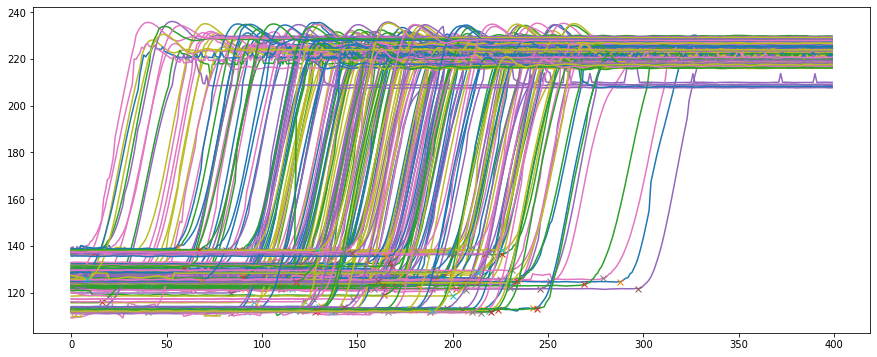

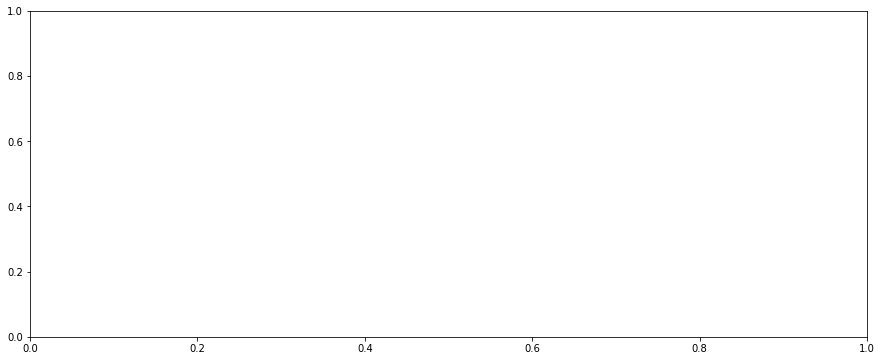

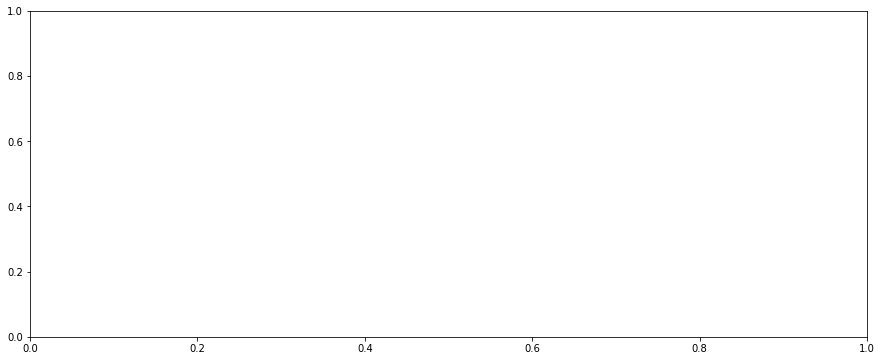

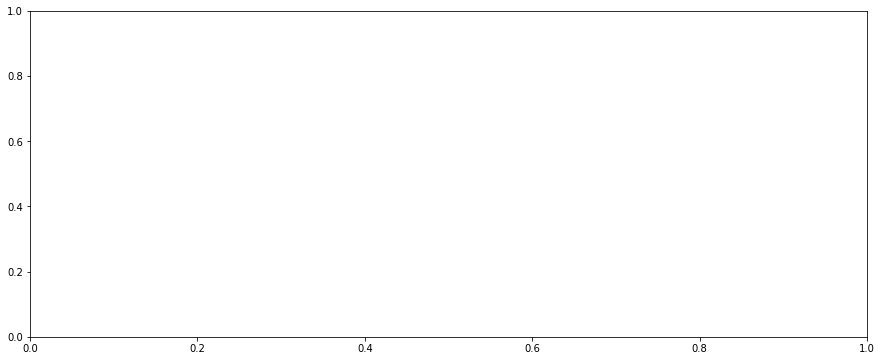

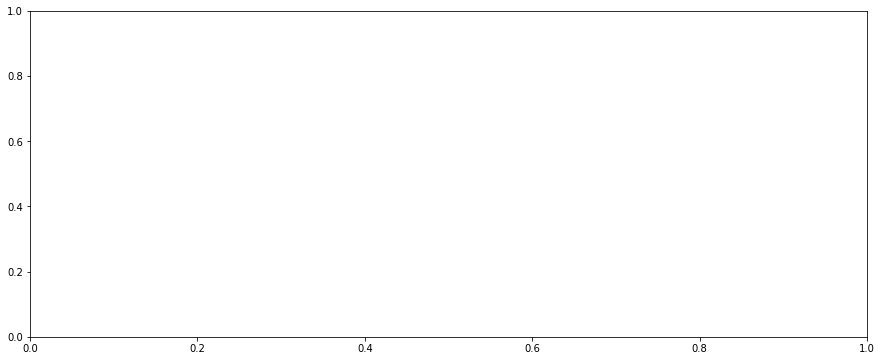

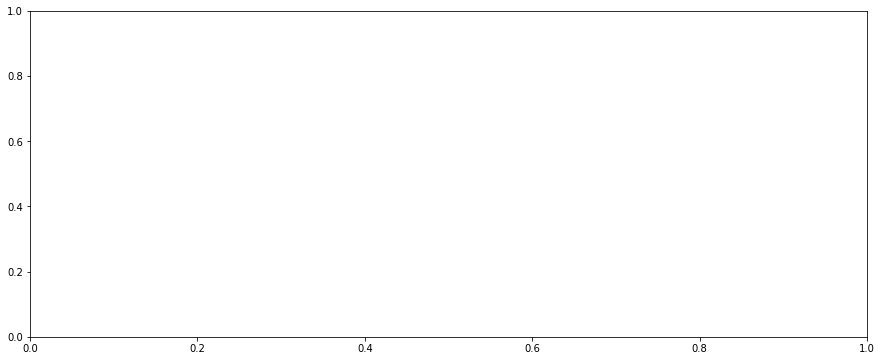

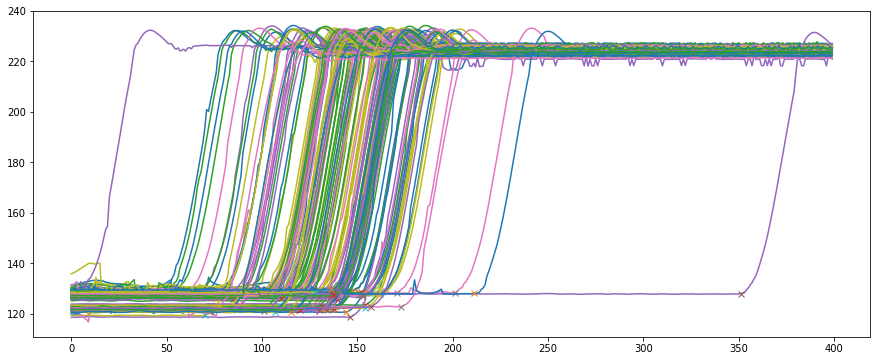

In [46]:
#Write script to pre-process and organize all pert trial into python dict for dict with seperate widths

search_key = ['4mm', 'Wei']#'5mm', '8mm', '10mm', '10_deg', '30_deg', 'Wei']
dict_percswings_widths = defaultdict(dict)

for i in np.arange(len(search_key)):
    dict_ridge = dict_ridge_widths[search_key[i]]
    dict_ridge = exclude_traces_after_QC(dict_ridge)
    dict_ridge = assign_dict_value_ridge_pos(dict_ridge)
    dict_ridge = assign_dict_value_FlippedRidgeTraces(dict_ridge)
    dict_ridge = assign_dict_value_RidgePeak(dict_ridge)
    dict_ridge = assign_dict_value_TAClassifier(dict_ridge)
    dict_ridge = assign_dict_value_TrialClassifier(dict_ridge)
    dict_ridge = assign_dict_value_FlippedTATraces(dict_ridge)
    dict_ridge = assign_dict_value_TA_and_Ridge_chunkPSTH(dict_ridge)
#    dict_ridge = alignSideandTopCamTraces(dict_ridge)
    dict_percswings_widths[search_key[i]] = excludeNaNTATraces(dict_ridge)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


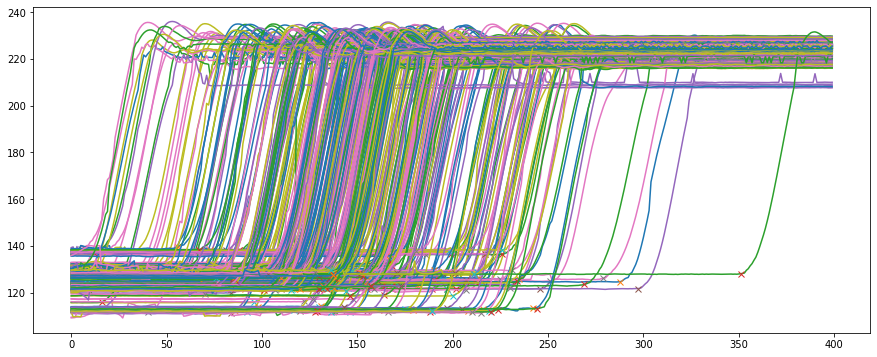

In [47]:
#Write script to pre-process and organize all pert trial into python dict

search_key = ['all']#, '5mm', '8mm', '10mm']
dict_percswings_all = defaultdict(dict)

for i in np.arange(len(search_key)):
    dict_ridge = dict_ridge_all[search_key[i]]
    dict_ridge = exclude_traces_after_QC(dict_ridge)
    dict_ridge = assign_dict_value_ridge_pos(dict_ridge)
    dict_ridge = assign_dict_value_FlippedRidgeTraces(dict_ridge)
    dict_ridge = assign_dict_value_RidgePeak(dict_ridge)
    dict_ridge = assign_dict_value_TAClassifier(dict_ridge)
    dict_ridge = assign_dict_value_TrialClassifier(dict_ridge)
    dict_ridge = assign_dict_value_FlippedTATraces(dict_ridge)
    dict_ridge = assign_dict_value_TA_and_Ridge_chunkPSTH(dict_ridge)
#    dict_ridge = alignSideandTopCamTraces(dict_ridge)
    dict_percswings_all[search_key[i]] = excludeNaNTATraces(dict_ridge)

  

In [48]:
def getTrajArray_from_dict(dict):
    data = list(dict.items())
    an_array = np.array(data)
    return an_array

In [49]:
def return_Mean_STD_forPSTH(array_value_dict):
    mean_array = np.nanmean(array_value_dict, axis = 0)
    STD_array = stats.sem(array_value_dict, nan_policy='omit')
    return mean_array, STD_array

In [50]:
def assign_quadrant_classifier(TA, no_quad = 6):
    lst = np.arange(361)
    chunks_list = np.array_split(lst, no_quad)
    classifier = []
    for i in np.arange(len(chunks_list)):
        first_value = chunks_list[i][0]
        last_value = chunks_list[i][-1]
        if first_value <= TA <= last_value:
            classifier = i
    return classifier

In [51]:
###############Figure 4C

In [52]:
# DECIDE HERE INTERVAL TO PLOT
int_beg = 75
int_end = 180

In [53]:
def excludeTATracesHighDerivative(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = smooth(values_list[i][-3][0])
        TA_diff = np.diff(TA_traj)
        #print(TA_diff)
        if np.any(TA_diff>100) or np.any(TA_diff<-100):
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)

    return dict_ridge   

In [54]:
def excludeTATracesabove180(dict_ridge):
    #Exclude from dict all trials where the TA traj is higher than 180 before pert
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][-1][0]#[0:250]
        TA_traj_before_pert = TA_traj[0:100]
        #BodyAxis = values_list[i][-3][3]
        #plt.plot(TA_traj_before_pert)
        if np.any(TA_traj>600) or np.any(TA_traj<-70):# or np.any(BodyAxis>150) or np.any(BodyAxis<50):
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)

    return dict_ridge   

In [55]:
def splitsequenceequally(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

In [56]:
def find_idx_trace_below_thresh(trace, thresh, ridge_peak):
    #Take trace leftward to the peak
    #trace_left = trace[0:100]
    new_idx = 0
    i = ridge_peak
    trace = np.diff(smooth(trace, 20))
    #print(trace, thresh, ridge_peak)
    while i > 0:
        if trace[i] < thresh:
            new_idx = i
            break
        else:
            i -= 1
    return new_idx-10

In [57]:
def extract_and_trapezoidal_integral(arr, start, end):
    # Step 1: Extract a certain range of values from the array
    extracted_range = arr[start:end]

    # Step 2: Select non-negative values
    non_negative_values = extracted_range[extracted_range >= 0]

    # Step 3: Calculate the trapezoidal integral for non-negative values
    trapz_integral = np.trapz(non_negative_values)

    return trapz_integral

In [58]:
def plot_and_append_AngMomTraces(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    TA_HA_comb_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = np.diff(values_filename_list[i][-1][5])
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250 and all(TA_traj<410) \
                    and all(TA_traj[150:200]>180) and TA_traj[110]<250:
                    #and all(TA_traj>-20)and all(TA_traj[150:200]<220):
                        plt.xlabel('Time (s)', fontsize=18)
                        plt.ylabel('Angle (degree)', fontsize=18)
                        plt.tick_params(axis='both', which='major', labelsize=14) 
                        #append values
#                         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

                        TA_traj_list.append(smooth(np.diff(TA_traj), 10))
                        HA_traj_list.append(smooth(np.diff(HA_traj), 10))
                        Ridge_traj_list.append(smooth(-np.diff(Ridge_traj), 10))
                        HA_AngMom = np.diff(smooth(HA_traj*40, 10))
                        TA_AngMom =  np.diff(smooth(TA_traj*8.15, 10))
                        Tot_AngMom = HA_AngMom+TA_AngMom
                        #compute attenuation, change range to 57, 73, 85 based on duration of tilt
                        #Here I compute angmom, can change window specified below
#                         range_wind = 165
#                         TA_cum_angmom = np.trapz(abs(TA_AngMom[100:162]))#int_beg+range_wind])#120:130#130:145 #100:165 #110:162
#                         HA_cum_angmom = np.trapz(abs(HA_AngMom[100:162]))#int_beg+range_wind])
                        
#                         TA_cum_angmom = extract_and_trapezoidal_integral(TA_AngMom, angmom_lowerinterv, angmom_higherinterv)
#                         HA_cum_angmom = extract_and_trapezoidal_integral(HA_AngMom, angmom_lowerinterv, angmom_higherinterv)

                        TA_cum_angmom = np.trapz((TA_AngMom[angmom_lowerinterv:angmom_higherinterv]))#int_beg+range_wind])#120:130#130:145 #100:165 #110:162
                        HA_cum_angmom = np.trapz((HA_AngMom[angmom_lowerinterv:angmom_higherinterv]))#int_beg+range_wind])
        
#                         TA_plus_HA_angmom = np.trapz((Tot_AngMom[angmom_lowerinterv:angmom_higherinterv]))#int_beg+range_wind])#120:130#130:145 #100:165 #110:162
                        TA_plus_HA_angmom = TA_cum_angmom+HA_cum_angmom
                
                        TA_traj_list_AngMom.append(TA_cum_angmom)
                        HA_traj_list_AngMom.append(HA_cum_angmom)
                        TA_HA_comb_list.append(TA_plus_HA_angmom) 
                        #plot output to check
                        plt.plot(HA_AngMom)#[int_beg:int_beg+range_wind])#+HA_AngMom[int_beg:int_beg+44])

                        
    return TA_traj_list, HA_traj_list, Ridge_traj_list, TA_traj_list_AngMom, HA_traj_list_AngMom, TA_HA_comb_list

In [59]:
# int_beg = 75
# int_end = 180

In [60]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, legend_id):
    #clrs = sns.color_palette("husl", len(mean_array))
    label_strings = ['Tail', 'Ridge', 'Hip', 'Ridge', 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm', 'a', 'a', 'a', 'a', 'a']
#    _, ax = plt.subplots(figsize=(12, 8))
    clr_id = [0,2, 3,2, 0,2, 0,2]
    print(len(legend_id), len(clrs), len(mean_array))
    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i]#[int_beg:int_end]#-mean_array[i][100]
            x = np.linspace(0 , len(mean_array[i]), len(mean_array[i]))
            ax.plot(x, mean_array[i], c=clrs[clr_id[i]], alpha=lineopacity)#, label = legend_id[i]
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.2, facecolor=clrs[clr_id[i]])
#             ax.fill_between(x, mean_array[i]-std_array[i][int_beg:int_end], mean_array[i]+std_array[i][int_beg:int_end], \
#                             alpha=0.2, facecolor=clrs[clr_id[i]])
            #ax.legend(loc="upper right", fontsize = 13, frameon=False)
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
            ax.axvline(110,0,360, color = 'red')
            ax.axvline(130,0,360, color = 'red')
            ax.axvline(162,0,360, color = 'red')

    return ax

In [61]:
def compute_AngMom_width(TA_traj_list, Ridge_traj_list, HA_traj_list, TA_HA_comb_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)
    mean_HA, std_HA = return_Mean_STD_forPSTH(HA_traj_list)
    mean_Ridge, std_Ridge = return_Mean_STD_forPSTH(Ridge_traj_list)
    mean_combo, std_combo = return_Mean_STD_forPSTH(TA_HA_comb_list)

    mean_TA = mean_TA*13#8.15#*13#*8.15
    mean_HA=mean_HA*40
    mean_Ridge = smooth_acausal(mean_Ridge*5*5.5, 0.09)
    mean_combo = mean_TA+mean_HA
    std_combo = std_TA+std_HA
    
    means = [mean_TA, mean_Ridge, mean_HA, mean_combo]
    stds = [std_TA*8.15, std_Ridge*5*5.5, std_HA*40, std_combo]
    return means, stds

In [62]:
#Here the parameter to adjust to get all values of momenta for figure 2

#['4mm', '5mm', '8mm', '10mm'] early phase
# angmom_lowerinterv = [100, 100, 100, 100]
# angmom_higherinterv = [130, 130, 130, 130]

#['4mm', '5mm', '8mm', '10mm'] late phase
# angmom_lowerinterv = [130, 130, 130, 130]
# angmom_higherinterv = [145, 145, 145, 145]

#['10_deg', '4mm', '30_deg'] for all graphs (including normalized one)
#[100, 100, 100]
#[162, 162, 162]#[138, 150, 162]

angmom_lowerinterv = [100, 100, 100, 100]
angmom_higherinterv = [130, 130, 130, 130]

2

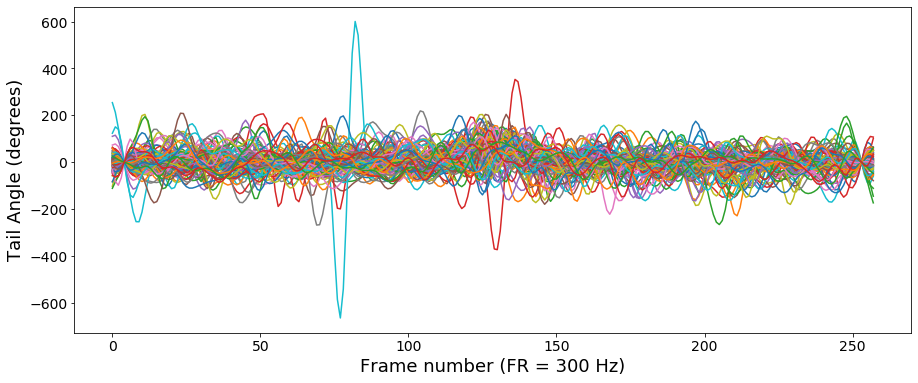

In [63]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm', 'Wei']#, 'Wei']#['4mm', '5mm', '8mm', '10mm']#, '10_deg', '4mm', '30_deg']

color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
#dict_HA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, Ridge_traj_list, TA_traj_list_AngMom,  HA_traj_list_AngMom, TA_HA_comb_list = \
    plot_and_append_AngMomTraces(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])
    #compute means+stds
    means, stds = compute_AngMom_width(TA_traj_list, Ridge_traj_list, HA_traj_list, TA_HA_comb_list)
    list_means_AngMom.append(means)
    list_std_AngMom.append(stds)
    #list of mom hips and tail
    list_TA_AngMom_conditions.append(TA_traj_list_AngMom)
    list_HA_AngMom_conditions.append(HA_traj_list_AngMom)
    dict_TA_AngMom_conditions[i] = [TA_traj_list_AngMom, HA_traj_list_AngMom, TA_HA_comb_list]
#     #compute attenuation
    

clrs = sns.color_palette("viridis", n_colors=8)   
mean_pert_traces = np.nanmean(TA_traj_list, axis = 0)
#plt.plot(mean_pert_traces, color = clrs[0], linewidth = 4)
#plt.savefig('out.svg', format='svg', dpi=1200)
plt.xlabel('Frame number (FR = 300 Hz)')
plt.ylabel('Tail Angle (degrees)')
# plt.xlim(75, 44/0.3)
# plt.ylim(-2, 8)
len(list_means_AngMom)

In [64]:
#returr neg values
def neg(lst):
    return [x for x in lst if x < 0] or None

In [65]:
dict_TA_AngMom_conditions

defaultdict(dict,
            {0: [[585.9507308963556,
               570.7844494690621,
               539.9830687603453,
               533.6785340616722,
               1087.9953355474322,
               382.4181058872598,
               217.42324886156592,
               727.4999675432474,
               555.6693278520579,
               716.6193776689724,
               287.6347663674046,
               320.0195133925579,
               696.4624526894403,
               547.2577679226968,
               356.9680839981917,
               647.7830142332347,
               873.013245823546,
               287.16696614261167,
               665.6529776071328,
               807.543577834489,
               579.6578472829829,
               365.68775237373393,
               1118.4732209071792,
               451.176444397149,
               385.5077208101304,
               751.2535574409197,
               444.17035557032324,
               427.7058020258954,
               494.38503

In [66]:
# #I WANT TO GET CUMULATIVE ANG MOM FOR PERTURBATION OF DIFFERENT DURATION DURING THE TILT
# #INTERVALS ARE 44, 55, 67
# print(TA_traj_list_AngMom, HA_traj_list_AngMom)
# # neg_ang_mom = neg(list_means_AngMom[2][1][90:90+67])
# # plt.plot(neg_ang_mom)
# # np.trapz(neg_ang_mom) #Trapz ang mom, change 1st bracket to get trace for tilt of diff duration

0
11 8 4
2952.9388994488963
1
11 8 4
3091.4798730203447


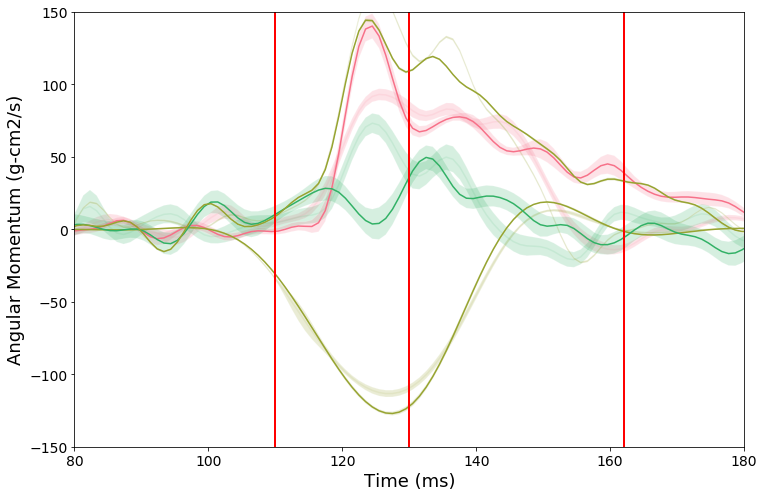

In [67]:
_, ax = plt.subplots(figsize=(12, 8))
clrs = sns.color_palette("husl", 8)
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
lineopacity = [0.1, 1]#0.5, 0.8, 1]

legend_id = ['pert 10 deg', 'pert 20 deg', 'pert 30 deg', 'b', 'pert 10 deg', 'pert 20 deg', 'pert 30 deg', 'b', 'b', 'b', 'b', 'b']
for i in np.arange(len(list_means_AngMom)):
    print(i)
    plot_PSTH_Mean_STD_label_color_pre_assigned(list_means_AngMom[i], list_std_AngMom[i], ax, lineopacity[i], legend_id[i])
    print(np.trapz(abs(list_means_AngMom[i][1][100:170])))
    #Change interval to [100:138] for L tilt, [100:150] for L tilt, [100:164] for L tilt
#     print(extract_and_trapezoidal_integral(-list_means_AngMom[i][1], 100, 164))
    ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14) 
plt.xlim(80, 180)

plt.ylim(-150, 150)
plt.savefig('out_bla_2.svg', format='svg', dpi=1200)



In [68]:
############# Extract Reaction Times from Tail traces

In [69]:
def extract_RT(input_array, reference_index, threshold=0):
    """
    Subtract each element of the input array from the value at the reference index,
    then extract the index where the resulting time series crosses a threshold.

    Parameters:
    - input_array (list or numpy array): The 1D array.
    - reference_index (int): The index to subtract from.
    - threshold (float): The threshold value for identifying the crossing.

    Returns:
    - crossing_index (int): The index where the time series crosses the threshold after the reference index.
      Returns -1 if no crossing index is found.
    """

    # Subtract each element from the value at the reference index
    subtracted_time_series = np.array(input_array[reference_index:]) - input_array[reference_index]

    try:
        # Find the index where the subtracted time series crosses the threshold
        crossing_index = next(i for i, value in enumerate(subtracted_time_series) if value > threshold)

        # Adjust the index to be relative to the original array
        crossing_index += reference_index

    except StopIteration:
        # If no crossing index is found, return -1
        crossing_index = []#-1

    return input_array[crossing_index], crossing_index


In [70]:
# def find_peak_vel(array, peak_offset, threshold_low, threshold_high):
#     array_vel = array  # smooth(np.diff(array), 5)
#     x = np.linspace(1, len(array_vel), len(array_vel))

#     # Find peaks and their indices
#     idx_peak, _ = find_peaks(array_vel, distance=15)

#     if len(idx_peak) == 0:
#         # No peaks found, return None
#         return None, None

#     # Find the index from the maximum peak
#     i_max_peak = idx_peak[np.argmax(array_vel[idx_peak])]

#     # Check if the peak value is within the specified thresholds
#     peak_value = array_vel[i_max_peak]
#     if peak_value < threshold_low or peak_value > threshold_high:
#         # Peak value is outside the specified thresholds, return None
#         return None, None

#     # Uncomment the following lines if you also need the x value from the index
#     # Find the x value from that index
#     # x_max = np.array(x[i_max_peak])

#     return peak_value, peak_offset+i_max_peak

In [71]:
def plot_and_append_RT(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    TA_HA_comb_list = []
    RT_tail_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = np.diff(values_filename_list[i][-1][5])
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250 and all(TA_traj<410) \
                    and all(TA_traj[150:200]>180) and TA_traj[110]<250:
                    #and all(TA_traj>-20)and all(TA_traj[150:200]<220):
                        plt.xlabel('Time (s)', fontsize=18)
                        plt.ylabel('Angle (degree)', fontsize=18)
                        plt.tick_params(axis='both', which='major', labelsize=14) 
                        #append values
#                         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
                        TA_traj = smooth(TA_traj, 10)
                        HA_traj = smooth(HA_traj, 10)
                        #RT
                        tilt_onset = 100
                        Onset_tail, RT_tail = extract_RT(TA_traj, tilt_onset, 5) #input_array, reference_index, threshold=0
                        RT_tail_sec = (RT_tail-tilt_onset)*3.3333
                        print(RT_tail_sec)
                        

                        TA_traj_list.append(TA_traj)
                        HA_traj_list.append(HA_traj)            
                        RT_tail_list.append(RT_tail)
               
                        #plot output to check
                        plt.plot(TA_traj)#[int_beg:int_beg+range_wind])#+HA_AngMom[int_beg:int_beg+44])
                        plt.plot(RT_tail, TA_traj[RT_tail], 'x')

                        
    return TA_traj_list, HA_traj_list, RT_tail_list

59.9994
19.9998
39.9996
79.9992
66.666
9.9999
13.3332
83.3325
83.3325
73.3326
3.3333
69.9993
26.6664
13.3332
66.666
43.3329
26.6664
73.3326
86.6658
16.6665
16.6665
63.332699999999996
36.6663
6.6666
9.9999
19.9998
13.3332
69.9993
59.9994
63.332699999999996
69.9993
73.3326
99.999
16.6665
83.3325
66.666
73.3326


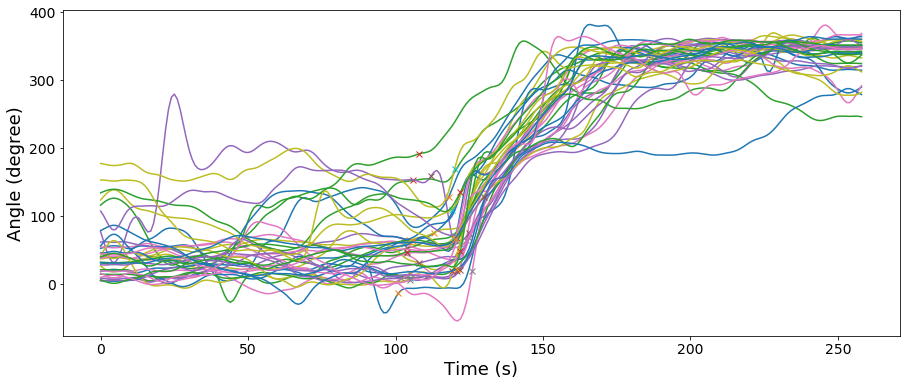

In [72]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['Wei']#'4mm', '5mm', '8mm', '10mm']#, '10_deg', '4mm', '30_deg']

color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
#dict_HA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, RT_tail_list = \
    plot_and_append_RT(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])

    

In [73]:
############# Extract Time to peak and peak velocity from ipsi VS contra trials (all widths included)

In [74]:
def find_peak_vel(array, peak_offset, threshold_low, threshold_high):
    array_vel = array  # smooth(np.diff(array), 5)
    x = np.linspace(1, len(array_vel), len(array_vel))

    # Find peaks and their indices
    idx_peak, _ = find_peaks(array_vel, distance=15)

    if len(idx_peak) == 0:
        # No peaks found, return None
        return None, None

    # Find the index from the first peak
    i_max_peak = idx_peak[0]#idx_peak[np.argmax(array_vel[idx_peak])]

    # Check if the peak value is within the specified thresholds
    peak_value = array_vel[i_max_peak]
    if peak_value < threshold_low or peak_value > threshold_high:
        # Peak value is outside the specified thresholds, return None
        return None, None

    # Uncomment the following lines if you also need the x value from the index
    # Find the x value from that index
    # x_max = np.array(x[i_max_peak])

    return peak_value, peak_offset+i_max_peak

In [75]:
#To populate all values we need to change 1) Trialsclassvalue, 2) the next if statement depending on ipsi or contra, 
#3) threshold_peak_low for tail/hips, 4) TA_vel_traj has minus for contra trials, 5) the output to be printed
def plot_and_append_RT(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    TA_HA_comb_list = []
    RT_tail_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==-1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = np.diff(values_filename_list[i][-1][5])
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250  \
                    and np.nanmean(TA_traj[80:100])>120: 


                        TA_traj = smooth(TA_traj, 10)
                        HA_traj = smooth(HA_traj, 10)

                        #Peak Vel
                        TA_vel_traj = np.diff(TA_traj)
                        HA_vel_traj = np.diff(HA_traj)
                        peak_offset = 110 
                        threshold_peak_low = 3.5#8 tail, 3.5 hips
                        threshold_peak_high = 15
                        TA_peakvel, idx_maxvel_TA = find_peak_vel(-TA_vel_traj[peak_offset:135], peak_offset, threshold_peak_low, \
                                                              threshold_peak_high)
                        HA_peakvel, idx_maxvel_HA = find_peak_vel(HA_vel_traj[peak_offset:135], peak_offset, threshold_peak_low, \
                                                              threshold_peak_high)
                        if HA_peakvel:
                            print(HA_peakvel)

                        TA_traj_list.append(TA_traj)
                        HA_traj_list.append(HA_traj)            
#                         RT_tail_list.append(RT_tail)

                        if idx_maxvel_TA:
                            plt.plot(TA_vel_traj)#[int_beg:int_beg+range_wind])#+HA_AngMom[int_beg:int_beg+44])
                            plt.plot(idx_maxvel_TA, TA_vel_traj[idx_maxvel_TA], 'x')

                        
    return TA_traj_list, HA_traj_list, RT_tail_list

4.029188186489705
4.189878999666462
3.5874357612930794
5.070289991918457
3.60811462320828
5.450851835282663
4.005257350299814
3.698013305101142
3.7982465260564595
4.900157782199926
4.715145746996541
4.801225112451277
11.824171716082844


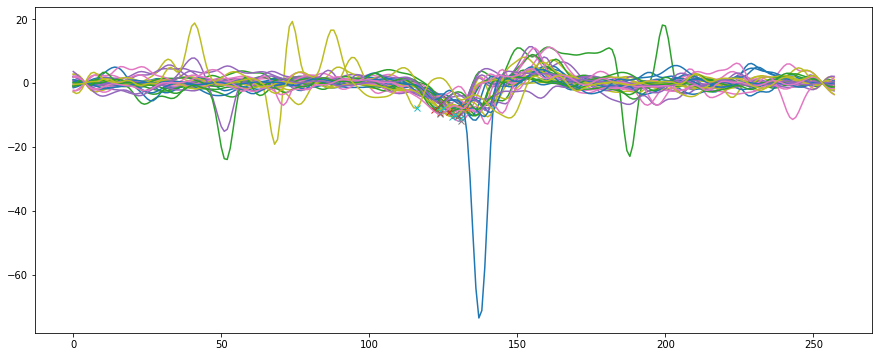

In [76]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm', '5mm', '8mm', '10mm']#, '10_deg', '4mm', '30_deg']

color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
#dict_HA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, RT_tail_list = \
    plot_and_append_RT(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])

    

In [77]:
############# Extract Time to peak tail angle trace and Reaction Time (to get the slope)
############# from ipsi VS contra trials (all widths included)

In [78]:
#To populate all values we need to change 1) Trialsclassvalue, 2) the next if statement depending on ipsi or contra, 
#3) threshold_peak_low for tail/hips, 4) TA_vel_traj has minus for contra trials, 5) the output to be printed
def plot_and_append_RT(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    TA_HA_comb_list = []
    RT_tail_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = np.diff(values_filename_list[i][-1][5])
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250  \
                    and np.nanmean(TA_traj[80:100])>120:

                        #ipsi
                        TA_traj = smooth(TA_traj, 10)
#                         #contra
#                         TA_traj = -smooth(TA_traj, 10)+360
                        
                        HA_traj = smooth(HA_traj, 10)-180

                        #Peak Vel
                        TA_vel_traj = TA_traj
                        HA_vel_traj = HA_traj
                        peak_offset = 120 
                        threshold_peak_low = 3.5#8 tail, 3.5 hips
                        threshold_peak_high = 500
                        TA_peakvel, idx_maxvel_TA = find_peak_vel(TA_vel_traj[peak_offset:160], peak_offset, threshold_peak_low, \
                                                              threshold_peak_high)
                        HA_peakvel, idx_maxvel_HA = find_peak_vel(HA_vel_traj[peak_offset:160], peak_offset, threshold_peak_low, \
                                                              threshold_peak_high)
                        #Reaction Time
                        tilt_onset = 110
                        Onset_tail, RT_tail = extract_RT(TA_vel_traj, tilt_onset, 5) 

                        TA_traj_list.append(TA_traj)
                        HA_traj_list.append(HA_traj)            

                        #Tail
                        if idx_maxvel_TA and np.nanmean(TA_traj[150])>250:
                            plt.plot(TA_vel_traj)#[int_beg:int_beg+range_wind])#+HA_AngMom[int_beg:int_beg+44])
                            plt.plot(idx_maxvel_TA, TA_vel_traj[idx_maxvel_TA], 'x')
                            plt.plot(RT_tail, TA_vel_traj[RT_tail], 'o')
#                             print(idx_maxvel_TA)
                            
                            #Slope
                            slope = ((TA_peakvel-Onset_tail)*360)/((idx_maxvel_TA-RT_tail)*1000) #rps
#                             slope = RT_tail 

#                             print(slope)
                            
#                         #Hips
#                         if idx_maxvel_HA:
#                             plt.plot(HA_vel_traj)#[int_beg:int_beg+range_wind])#+HA_AngMom[int_beg:int_beg+44])
#                             plt.plot(idx_maxvel_HA, HA_vel_traj[idx_maxvel_HA], 'x')
#                             print(idx_maxvel_HA)

                        
    return TA_traj_list, HA_traj_list, RT_tail_list

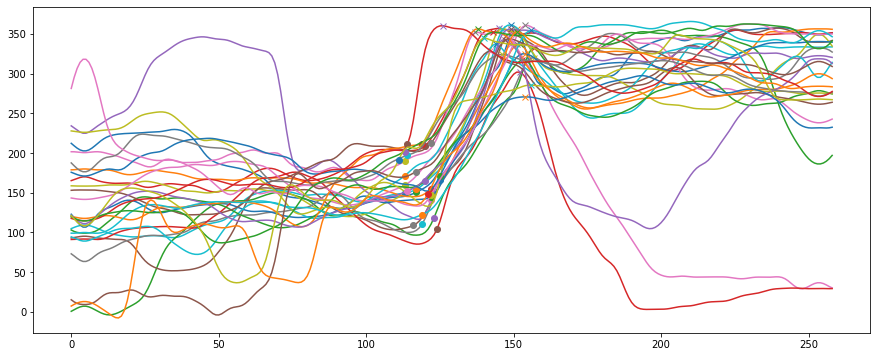

In [79]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm', '5mm', '8mm', '10mm']#, '10_deg', '4mm', '30_deg']

color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
#dict_HA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, RT_tail_list = \
    plot_and_append_RT(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])

    

In [80]:
####################Plot COMY velocity during perturbation for 10-20-30 deg tilts

In [81]:
# DECIDE HERE INTERVAL TO PLOT
int_beg = [75, 75, 75, 75]
int_end = [220, 220, 220, 220] #13 is delay interval between end of 10 vs 20 deg, and 9 is delay btw 10vs30 deg tilt

In [82]:
def find_min_pos_value(l):
    min_pos = min([i for i in l if i > 0])
    return min_pos

In [83]:
def countNo_valuesBelowThresh(l, t):
    n = np.count_nonzero(l < t)
    return n

In [84]:
def plot_and_append_COMYVel(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    COMYVel_traj_list = []
    v_ratio_list = []
    time_imm_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
    #     res = excludeTATracesHighDerivative(res)
    #    res = excludeTATracesabove180(res)
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = smooth_acausal((values_filename_list[i][-1][5]))
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250 and all(TA_traj<410) \
                    and all(TA_traj[150:200]>180) and TA_traj[110]<250:
                        x = np.linspace(0, 250/300, 250)
                        COMYVel_traj = smooth(np.diff(COMYVel_traj), 10)
                        plt.plot(COMYVel_traj,color = clrs[0], lw=1, alpha = 0.1)
                        COMYVel_traj_list.append(COMYVel_traj)
                        #Calculate distance travel (integral of velocity)
                        dist_trav = (np.trapz(COMYVel_traj[100:500]))*(4/5)#scaled by pixel size
#                         print(dist_trav)
                        #calculate mean of initial velocity and append to list
                        v_0 = np.nanmean(COMYVel_traj[0:50])
                        #calculate lowest speed
                        lowest_speed = find_min_pos_value(COMYVel_traj)
                        #calculate time spent at <0.01 m/s speed (freezing at BMC biol 2020)
                        No_values_below_speed = (countNo_valuesBelowThresh(COMYVel_traj, 0.041))#* 0.003#0.01/0.24(conversion pixel factor)
                        Time_spent_below_thresh = No_values_below_speed* 3.333
#                         print(No_values_below_speed)
                        #calculate ratio and append to list
                        v_ratio = lowest_speed/v_0
                        v_ratio_list.append(v_ratio)
                        print(v_ratio)
                        time_imm_list.append(Time_spent_below_thresh)

    return COMYVel_traj_list, v_ratio_list, time_imm_list                 

In [85]:
def compute_AngMom_width(TA_traj_list):#, Ridge_traj_list):#HA_traj_list, Ridge_traj_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)

    mean_TA = (mean_TA)

    means = [mean_TA]
    stds = [std_TA]
    return means, stds

0.04099469900220295
0.039863063723469386
0.005040077922466901
0.011137410690599562
0.002534917947747669
0.6667426706772557
0.014071134177075825
0.011834699441372668
0.11102274277692956
0.047408326808130376
0.025990628895547402
0.0019019949382825117
0.05226247881498572
0.0007300072660054978
0.007163327823696214
0.004739750649970199
0.18890852632462016
0.07760988837951137
0.08849993675658407
0.27914245120980247
0.009348513489606714
0.19361777839591676
0.0039895311969133825
0.3679620990044998
0.021141326585176184
0.10251459878802906
0.017323014900154195
0.2630970506774684
0.061453780120072736
0.006083642899935313
0.10318915102525994
0.12941795865500974
0.012105742629292567
0.0014077512599668096
0.09529684132333179
0.2299257757692261
0.24443639716524238
0.002486224901764889
0.01992873120724162
0.022927134931014673
0.13477358173358076
0.026167696814103285
0.006174482304437809
0.21375370714887282
0.0496136484193931
0.2619981020070908
0.053208421528697494
0.0022963066177719136
0.0619873278080

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice


(-6, 4)

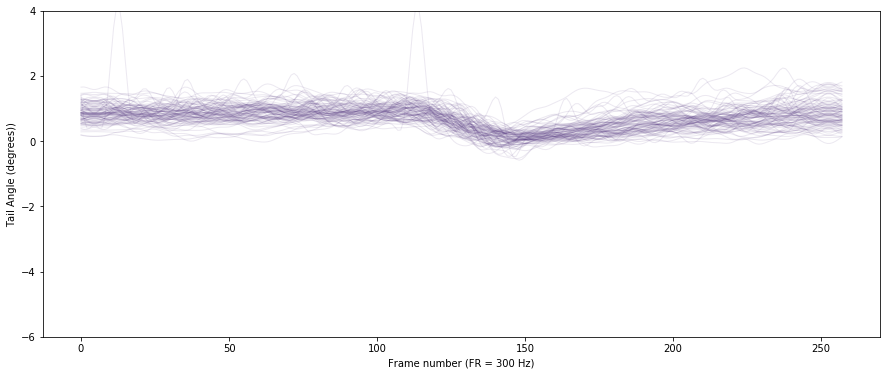

In [86]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm', 'Wei']#, 'Wei']#['4mm', '5mm', '8mm', '10mm']#'30_deg']#,'4mm', '30_deg']#'5mm', '8mm', '10mm']#, '30_deg']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    COMvel_list, v_ratio, time_imm_list = \
    plot_and_append_COMYVel(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])
    #take ratio of initial velocoty by final velocity
    #speed_dec_norm = v_0/low_speed#/v_0
#     print(v_ratio, time_imm_list)
    #compute means+stds
    means, stds = compute_AngMom_width(COMvel_list)#, Ridge_traj_list)#HA_traj_list, Ridge_traj_list)
    list_means_AngMom.append(means)
    list_std_AngMom.append(stds)

    
clrs = sns.color_palette("viridis", n_colors=8)   
mean_pert_traces = np.nanmean(TA_traj_list, axis = 0)
plt.xlabel('Frame number (FR = 300 Hz)')
plt.ylabel('Tail Angle (degrees))')
plt.ylim(-6,4)
# plt.xlim(100,170)

In [87]:
len(means)

1

In [88]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, legend_id, b1, b2):
    #clrs = sns.color_palette("husl", len(mean_array))
    label_strings = ['Tail', 'Ridge', 'Hip', 'Ridge']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))
    clr_id = [0,2]
    with sns.axes_style("darkgrid"):
        #boundaries of tilt delay for different durations b1, and b2
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i][b1:b2]#-mean_array[i][100]
            x = np.linspace(0, len(mean_array[i]), len(mean_array[i]))
            ax.plot(x, mean_array[i], c=clrs[clr_id[i]], label = legend_id[i], alpha=lineopacity)
            ax.fill_between(x, mean_array[i]-std_array[i][b1:b2], mean_array[i]+std_array[i][b1:b2], \
                            alpha=lineopacity, facecolor=clrs[clr_id[i]])
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
#             ax.axvline(50,0,360, color = 'red')
#             ax.axvline(65,0,360, color = 'red')
#             ax.axvline(75,0,360, color = 'red')

    return ax

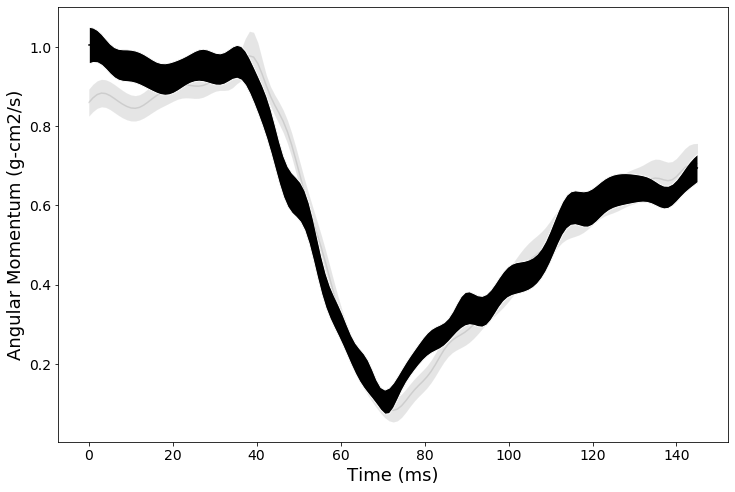

In [89]:
_, ax = plt.subplots(figsize=(12, 8))
clrs = 'k'
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
lineopacity = [0.1, 1]#0.3, 0.7, 1]

legend_id = ['pert 10 deg', 'pert 20 deg', 'pert 30 deg', 'pert 30 deg']
for i in np.arange(len(list_means_AngMom)):
    plot_PSTH_Mean_STD_label_color_pre_assigned(list_means_AngMom[i], list_std_AngMom[i], ax, lineopacity[i], legend_id[i], \
                                                int_beg[i], int_end[i])
    ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14) 
plt.savefig('out_bla.svg', format='svg', dpi=1200)


In [90]:
####################Plot data figure 5

In [91]:
# DECIDE HERE INTERVAL TO PLOT
int_beg = 80#90
int_end = 180

In [156]:
def compute_AngMom_width(TA_traj_list, HA_traj_list):#, Ridge_traj_list, TA_HA_comb_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)
    mean_HA, std_HA = return_Mean_STD_forPSTH(HA_traj_list)
#     mean_Ridge, std_Ridge = return_Mean_STD_forPSTH(Ridge_traj_list)
#     mean_combo, std_combo = return_Mean_STD_forPSTH(TA_HA_comb_list)

    mean_TA = mean_TA#*8.15)
    mean_HA=mean_HA#*40
#     mean_Ridge = smooth_acausal(mean_Ridge*5*5.5, 0.09)
    mean_combo = mean_TA+mean_HA
    std_combo = std_TA+std_HA

    means = [mean_TA, mean_HA-mean_HA[40]]#, mean_combo]
    stds = [std_TA, std_HA]#, std_combo]
    return means, stds

In [157]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, legend_id):
#     clrs = sns.color_palette("husl", len(mean_array))
    clrs = sns.color_palette("husl", 4)

    label_strings = ['Tail', 'Ridge', 'Hip', 'Ridge']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            print(len(mean_array))
            epochs = list(range(len(mean_array[i])))
            mean_array[i] = mean_array[i][int_beg:int_end]#-mean_array[i][100]
            x = np.linspace(0, (len(mean_array[i])), len(mean_array[i]))
            ax.plot(x, mean_array[i], c=clrs[i], label = legend_id[i], alpha=lineopacity)
            ax.fill_between(x, mean_array[i]-std_array[i][int_beg:int_end], mean_array[i]+std_array[i][int_beg:int_end], \
                            alpha=0.2, facecolor=clrs[i])
            ax.legend(loc="upper right", fontsize = 13, frameon=False)
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
            #ax.axvline(100/300,0,360, color = 'red')
            #ax.axvline(160,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax

In [ ]:
                       #ipsi
                        TA_traj = smooth(TA_traj, 10)
#                         #contra
#                         TA_traj = -smooth(TA_traj, 10)+360
                        
                        HA_traj = smooth(HA_traj, 10)-180

                        #Peak Vel
                        TA_vel_traj = TA_traj
                        HA_vel_traj = HA_traj
                        peak_offset = 120 
                        threshold_peak_low = 3.5#8 tail, 3.5 hips
                        threshold_peak_high = 500
                        TA_peakvel, idx_maxvel_TA = find_peak_vel(TA_vel_traj[peak_offset:160], peak_offset, threshold_peak_low, \
                                                              threshold_peak_high)
                        HA_peakvel, idx_maxvel_HA = find_peak_vel(HA_vel_traj[peak_offset:160], peak_offset, threshold_peak_low, \
                                                              threshold_peak_high)
                        #Reaction Time
                        tilt_onset = 110
                        Onset_tail, RT_tail = extract_RT(TA_vel_traj, tilt_onset, 5) 

                        TA_traj_list.append(TA_traj)
                        HA_traj_list.append(HA_traj)            

                        #Tail
                        if idx_maxvel_TA and np.nanmean(TA_traj[150])>250:

In [285]:
def return_slope_peak_vel(TA_traj):
    #Peak Vel
    slope = None  # Default value
    
    TA_vel_traj = TA_traj
#         HA_vel_traj = HA_traj
    peak_offset = 120 
    threshold_peak_low = 8#8 tail, 3.5 hips
    threshold_peak_high = 500
    TA_peakvel, idx_maxvel_TA = find_peak_vel(TA_vel_traj[peak_offset:160], peak_offset, threshold_peak_low, \
                                          threshold_peak_high)

    #Reaction Time
    tilt_onset = 110
    Onset_tail, RT_tail = extract_RT(TA_vel_traj, tilt_onset, 5) 

    TA_traj_list.append(TA_traj)
#         HA_traj_list.append(HA_traj)            

    #Tail
    if idx_maxvel_TA:# and np.nanmean(TA_traj[150])>250:
#         plt.plot(TA_vel_traj)#[int_beg:int_beg+range_wind])#+HA_AngMom[int_beg:int_beg+44])
#         plt.plot(idx_maxvel_TA, TA_vel_traj[idx_maxvel_TA], 'x')
#         plt.plot(RT_tail, TA_vel_traj[RT_tail], 'o')
# #                             print(idx_maxvel_TA)

        #Slope
        slope = ((TA_peakvel-Onset_tail)*360)/((idx_maxvel_TA-RT_tail)*1000) #rps
#                             slope = RT_tail
#     else:
#         print('not enough detectable slopes')
    return slope, RT_tail, idx_maxvel_TA

In [286]:
def plot_and_append_AngMomTraces(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    TA_HA_comb_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = np.diff(values_filename_list[i][-1][5])
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250 and all(TA_traj<410) \
                    and all(TA_traj[150:200]>180) and TA_traj[110]<250:
                    #and all(TA_traj>-20)and all(TA_traj[150:200]<220):
                        plt.xlabel('Time (s)', fontsize=18)
                        plt.ylabel('Angle (degree)', fontsize=18)
                        plt.tick_params(axis='both', which='major', labelsize=14) 
                        #append values
#                         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
                        TA_traj = smooth(TA_traj, 10)
                        HA_traj = smooth(HA_traj, 10)
                        TA_traj_list.append(TA_traj)
                        HA_traj_list.append(HA_traj)
#                         Ridge_traj_list.append(smooth(-np.diff(Ridge_traj), 10))
#                         HA_AngMom = np.diff(smooth(HA_traj*40, 10))
#                         TA_AngMom =  np.diff(smooth(TA_traj*8.15, 10))
#                         Tot_AngMom = HA_AngMom+TA_AngMom

#                         TA_cum_angmom = np.trapz((TA_AngMom[angmom_lowerinterv:angmom_higherinterv]))#int_beg+range_wind])#120:130#130:145 #100:165 #110:162
#                         HA_cum_angmom = np.trapz((HA_AngMom[angmom_lowerinterv:angmom_higherinterv]))#int_beg+range_wind])
        
#                         TA_plus_HA_angmom = TA_cum_angmom+HA_cum_angmom
                
#                         TA_traj_list_AngMom.append(TA_cum_angmom)
#                         HA_traj_list_AngMom.append(HA_cum_angmom)
#                         TA_HA_comb_list.append(TA_plus_HA_angmom) 
                        #plot output to check
                        plt.plot(TA_traj)
                        slope, RT_tail, idx_maxvel_TA = return_slope_peak_vel(TA_traj)
                        if slope:
                            plt.plot(idx_maxvel_TA, TA_traj[idx_maxvel_TA], 'x')
                            plt.plot(RT_tail, TA_traj[RT_tail], 'o')
                            print(slope)

                        
    return TA_traj_list, HA_traj_list, slope#, Ridge_traj_list, TA_traj_list_AngMom, HA_traj_list_AngMom, TA_HA_comb_list

2.1748128508424664
2.1315274022861956
2.6746480999059568
2.32815573677787
2.556228854308436
2.2620496383065314
2.3375921135376516
2.640205653706444
2.26392029959237
2.186360294927435
2.8629328077557474
2.071200312863255
1.9820273085088675
2.024302944028517
2.4873454267803283
2.025363933872985
1.6909188820226704
1.9288741454201346
1.1221127159987805
2.587847022754406
1.6602147777682676
2.077340060864874
1.3856915813832116
2.4668644512283
2.591412231711987
2.741123659520158
7.005216468899099
1.427107173053578
1.2396953878968593
4.486945861004102
2.830976867865902
1.7988632646103
2.5503579894533552
2.257021124895816
2.402391579131809
2.256193831952789
1.8033173191494576
1.8790182957436197
1.89896856460637
2.448874638994071
2.516795097794738
2.0211855156020477
0.1949290838052732
5.642042940742001
2.0181125746373096
4.305103185925688
4.860398542701708
2.3696204417116404
1.8904595210606767
6.1166346439294035
1.6469000198018413
1.784924917380604
2.2217188770906104
2.0315147230468136
1.6233387

Text(85.875, 0.5, 'Tail Angle (degrees))')

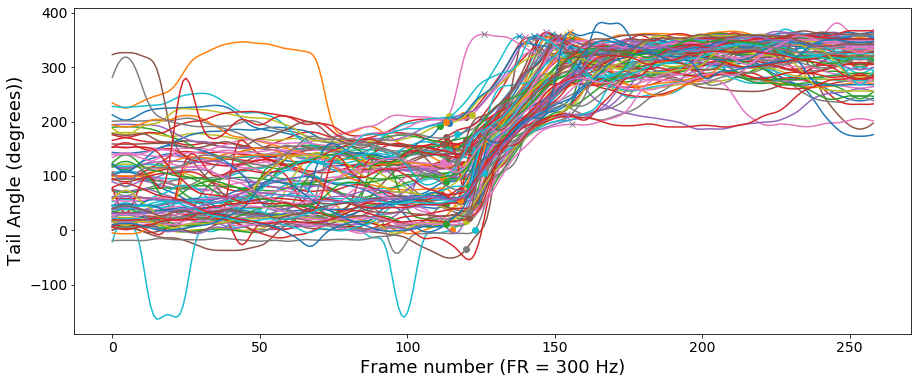

In [288]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm','Wei']#,'4mm', '30_deg']#['4mm', '5mm', '8mm', '10mm']#, '30_deg']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
#dict_HA_AngMom_conditions = defaultdict(dict)


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, slope = \
    plot_and_append_AngMomTraces(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])
    means, stds = compute_AngMom_width(TA_traj_list, HA_traj_list)#, Ridge_traj_list)
    list_means_AngMom.append(means)
    list_std_AngMom.append(stds)
    list_TA_AngMom_conditions.append(TA_traj_list_AngMom)
    list_HA_AngMom_conditions.append(HA_traj_list_AngMom)
    dict_TA_AngMom_conditions[i] = [TA_traj_list_AngMom, HA_traj_list_AngMom]

clrs = sns.color_palette("viridis", n_colors=8)   
mean_pert_traces = np.nanmean(TA_traj_list, axis = 0)
x = np.linspace(0, 250/300, 249)
#plt.plot(x, mean_pert_traces, color = clrs[0], linewidth = 4)
plt.savefig('out.svg', format='svg', dpi=1200)
plt.xlabel('Frame number (FR = 300 Hz)')
plt.ylabel('Tail Angle (degrees))')

In [284]:
slope


6.9216136517144

2
2
[15953.61339854  1076.55484671]


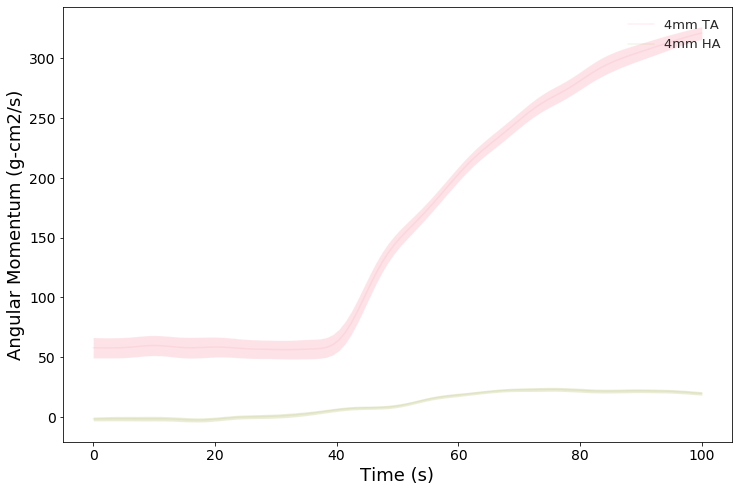

In [259]:
legend_id = [['4mm TA', '4mm HA', '4mm HA'], ['5mm TA', '5mm HA', '4mm HA'], ['8mm TA', '8mm HA', '4mm HA'], \
             ['10mm TA', '10mm HA', '4mm HA']]


_, ax = plt.subplots(figsize=(12, 8))
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
lineopacity = [0.1, 1]#, 0.4, 0.1]#[0.1, 0.4, 0.8, 1]

for i in np.arange(len(list_means_AngMom)):
    plot_PSTH_Mean_STD_label_color_pre_assigned(list_means_AngMom[i], list_std_AngMom[i], ax, lineopacity[i], legend_id[i])
    print(np.trapz(list_means_AngMom[i]))
    #ax1.scatter(list_HA_AngMom_conditions[i], list_TA_AngMom_conditions[i])
    ax.set_xlabel('Time (s)', fontsize=18)
    ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14) 
plt.savefig('out.svg', format='svg', dpi=1200)

In [ ]:
####################Plot data figure 5 A

In [ ]:
#     means, stds = compute_AngMom_width(TA_traj_list, HA_traj_list, Ridge_traj_list, TA_HA_comb_list)


In [115]:
def compute_AngMom_width(TA_traj_list, HA_traj_list):#, Ridge_traj_list, TA_HA_comb_list):
    mean_TA, std_TA = return_Mean_STD_forPSTH(TA_traj_list)
    mean_HA, std_HA = return_Mean_STD_forPSTH(HA_traj_list)
#     mean_Ridge, std_Ridge = return_Mean_STD_forPSTH(Ridge_traj_list)
#     mean_combo, std_combo = return_Mean_STD_forPSTH(TA_HA_comb_list)

    mean_TA = mean_TA#*8.15)
    mean_HA=mean_HA#*40
#     mean_Ridge = smooth_acausal(mean_Ridge*5*5.5, 0.09)
    mean_combo = mean_TA+mean_HA
    std_combo = std_TA+std_HA

    means = [mean_TA, _ , mean_HA]#, mean_combo]
    stds = [std_TA*8.15, _ , std_HA*40]#, std_combo]
    return means, stds

In [116]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, lineopacity, legend_id):
    clrs = sns.color_palette("husl", len(mean_array))
    label_strings = ['Tail', 'Ridge', 'Hip', 'Ridge']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            x = np.linspace(0, len(mean_array[i]), len(mean_array[i]))

            mean_array[i] = mean_array[i]#-mean_array[i][100]
            ax.plot(x, mean_array[i], c=clrs[i], label = legend_id[i], alpha=lineopacity)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.2, facecolor=clrs[i])
            ax.legend(loc="lower left")
            ax.set_xlabel('Frame number (FR = 300 Hz)')
            ax.set_ylabel('Angular Momentum (g-cm2/s)')
            #ax.axvline(100/300,0,360, color = 'red')
            #ax.axvline(160,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax

In [117]:
def plot_and_append_AngMomTraces(dict_ridge_Xwidth, angmom_lowerinterv, angmom_higherinterv, color_list):
    search_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
    #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    HA_traj_list = []
    TA_traj_list = []
    HA_traj_list_AngMom = []
    TA_traj_list_AngMom = []
    Ridge_traj_list = []
    TA_cum_angmom_list = []
    TA_HA_comb_list = []
    clrs = sns.color_palette("viridis", n_colors=8)   

    for i in np.arange(len(search_key)):
        res = dict(filter(lambda item: search_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_filename_list = list(res.values())
        key_filename_list = list(res.keys())
        for i in np.arange(len(key_filename_list)):
                Trial_classvalue = values_filename_list[i][-4]
                if Trial_classvalue ==1: #change to 1 for ips and to -1 for contra trials
                    RidgePert_classvalue = values_filename_list[i][-10]
                    HA_traj = smooth_acausal(values_filename_list[i][-1][4])
                    TA_traj = smooth_acausal(values_filename_list[i][-1][0])
                    Ridge_traj = smooth_acausal(values_filename_list[i][-1][6])#/5
                    COMYVel_traj = np.diff(values_filename_list[i][-1][5])
                    #UNCOMMENT 1st LINE FOR CONTRA TRIALS or 2nd LINE FOR IPSI TRIALS
                    if len(TA_traj) == 250 and len(HA_traj) == 250 and all(TA_traj<410) \
                    and all(TA_traj[150:200]>180) and TA_traj[110]<250:
                    #and all(TA_traj>-20)and all(TA_traj[150:200]<220):
                        plt.xlabel('Time (s)', fontsize=18)
                        plt.ylabel('Angle (degree)', fontsize=18)
                        plt.tick_params(axis='both', which='major', labelsize=14) 
                        #append values
#                         fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

                        TA_traj_list.append(smooth(TA_traj, 10))
                        HA_traj_list.append(smooth(HA_traj, 10))
                        Ridge_traj_list.append(smooth(-np.diff(Ridge_traj), 10))
                        HA_AngMom = np.diff(smooth(HA_traj*40, 10))
                        TA_AngMom =  np.diff(smooth(TA_traj*8.15, 10))
                        Tot_AngMom = HA_AngMom+TA_AngMom

                        TA_cum_angmom = np.trapz((TA_AngMom[angmom_lowerinterv:angmom_higherinterv]))#int_beg+range_wind])#120:130#130:145 #100:165 #110:162
                        HA_cum_angmom = np.trapz((HA_AngMom[angmom_lowerinterv:angmom_higherinterv]))#int_beg+range_wind])
        
                        TA_plus_HA_angmom = TA_cum_angmom+HA_cum_angmom
                
                        TA_traj_list_AngMom.append(TA_cum_angmom)
                        HA_traj_list_AngMom.append(HA_cum_angmom)
                        TA_HA_comb_list.append(TA_plus_HA_angmom) 
                        #plot output to check
                        plt.plot(HA_AngMom)#[int_beg:int_beg+range_wind])#+HA_AngMom[int_beg:int_beg+44])

                        
    return TA_traj_list, HA_traj_list, Ridge_traj_list, TA_traj_list_AngMom, HA_traj_list_AngMom, TA_HA_comb_list

57
37


Text(85.875, 0.5, 'Tail Angle (degrees))')

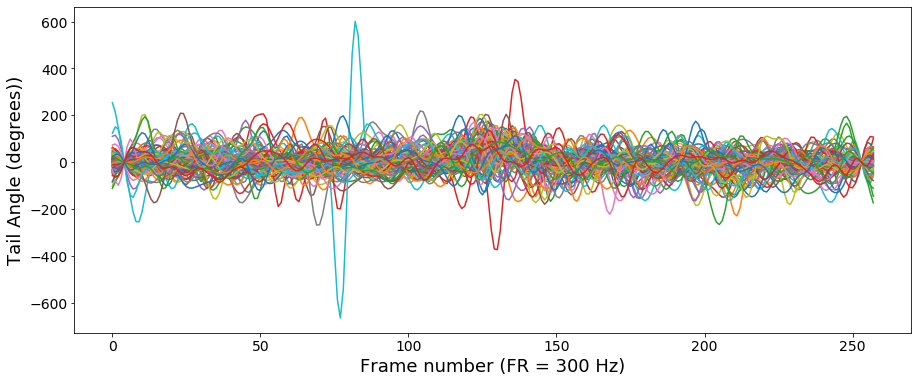

In [119]:
#Plot trials of same width together changing the dict_ridge_all key
Xwidth_keys = ['4mm', 'Wei']#, '8mm', '10mm']#, '30_deg']
angmom_lowerinterv = [100, 100, 100, 100, 105, 105, 105]
angmom_higherinterv = [150, 150, 150, 150, 150, 150]
color_list = ['y', 'r', 'b', 'g']
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
list_means_AngMom = []
list_std_AngMom = []
list_TA_AngMom_conditions = []
list_HA_AngMom_conditions = []
list_TAplusHA_AngMom_conditions = []
dict_TA_AngMom_conditions = defaultdict(dict)
list_Ridge_AngMom_conditions = []


for i in np.arange(len(Xwidth_keys)):
    TA_traj_list, HA_traj_list, Ridge_traj_list, TA_traj_list_AngMom,  HA_traj_list_AngMom, TA_HA_comb_list = \
    plot_and_append_AngMomTraces(dict_percswings_widths[Xwidth_keys[i]], angmom_lowerinterv[i], \
                                 angmom_higherinterv[i], color_list[i])
    means, stds = compute_AngMom_width(TA_traj_list, HA_traj_list)#, TA_HA_comb_list)
    print(len(TA_traj_list))
    list_means_AngMom.append(means)
    list_std_AngMom.append(stds)
    list_TA_AngMom_conditions.append(TA_traj_list_AngMom)
    list_HA_AngMom_conditions.append(HA_traj_list_AngMom)
    list_TAplusHA_AngMom_conditions.append(TA_HA_comb_list)
    dict_TA_AngMom_conditions[i] = [TA_traj_list_AngMom, HA_traj_list_AngMom]
    #list_Ridge_AngMom_conditions.append(Ridge_traj_list)


# #Compute mean of ang mom across widths for tail and hip and combination of both, and ridge
# tail_hip_ang_mom_mean = np.nanmean(list_means_AngMom, axis = 0)
# tail_hip_ang_mom_combined_mean = [tail_hip_ang_mom_mean[0], tail_hip_ang_mom_mean[1], tail_hip_ang_mom_mean[2], tail_hip_ang_mom_mean[0]+tail_hip_ang_mom_mean[2]]
# tail_hip_ang_mom_std = np.nanmean(list_std_AngMom, axis = 0)
# tail_hip_ang_mom_combined_std = [tail_hip_ang_mom_std[0], tail_hip_ang_mom_std[1], tail_hip_ang_mom_std[2], tail_hip_ang_mom_std[0]+tail_hip_ang_mom_std[2]]
# Ridge_ang_mom_mean = tail_hip_ang_mom_mean[2]

clrs = sns.color_palette("viridis", n_colors=8)   
mean_pert_traces = np.nanmean(TA_traj_list, axis = 0)
#plt.plot(mean_pert_traces, color = clrs[0], linewidth = 4)
plt.savefig('out.svg', format='svg', dpi=1200)
plt.xlabel('Frame number (FR = 300 Hz)')
plt.ylabel('Tail Angle (degrees))')

4


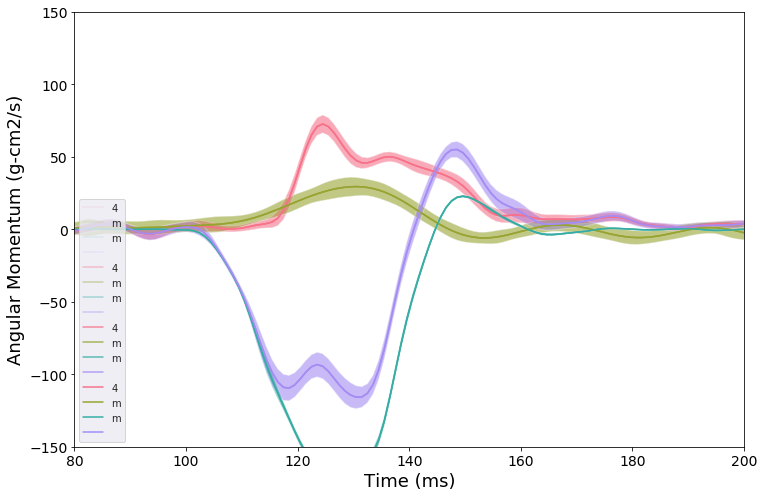

In [120]:
legend_id = ['4mm TA', '4mm HA','4mm TA', '4mm HA']#, 'jnnj']#[['4mm TA', '4mm HA'], ['5mm TA', '5mm HA'], ['8mm TA', '8mm HA'], ['10mm TA', '10mm HA']]


_, ax = plt.subplots(figsize=(12, 8))
clrs = sns.color_palette("husl", 8)
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
lineopacity = [0.1, 0.4, 0.8, 1]
print(len(tail_hip_ang_mom_combined_mean))
for i in np.arange(len(tail_hip_ang_mom_combined_mean)):
    plot_PSTH_Mean_STD_label_color_pre_assigned(tail_hip_ang_mom_combined_mean, tail_hip_ang_mom_combined_std, ax, lineopacity[i], legend_id[i])
    #print(np.trapz(list_means_AngMom[i]))
#     x = np.linspace(0, 250/300, 249)
#     plt.plot(x, Ridge_ang_mom_mean/2)
    ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14) 
    plt.xlim(80, 200)

    plt.ylim(-150, 150)
plt.savefig('out.svg', format='svg', dpi=1200)

In [102]:
list_TAplusHA_AngMom_conditions

[[2570.1165780270494,
  1514.372086800708,
  4220.6860106455815,
  2820.6587160453905,
  4132.959921855373,
  3675.001363076206,
  2856.437803098018,
  2776.496471040856,
  4125.515601017014,
  2650.921999147332,
  2288.503579619954,
  2303.4336426413624,
  3432.2539288790163,
  2328.110456086562,
  2152.595040772988,
  3145.177241056927,
  1766.5590322194485,
  2977.006969595228,
  2731.9507795859627,
  2273.1297205773126,
  2981.733676863619,
  1955.341156948126,
  2982.8849033975166,
  1762.7440431474458,
  1318.0582523156072,
  2262.40550761465,
  2746.48792661951,
  2924.46902898041,
  3206.72367725595,
  1003.3599864629894,
  2284.731814283859,
  2268.6044752927455,
  1917.522036717155,
  2669.3780992035763,
  2153.5780058118225,
  3398.872711456687,
  2967.6172464551773,
  1610.4810273071253,
  1022.233449638919,
  5379.531125970074,
  2061.596160048396,
  3827.476622339773,
  3156.884446209093,
  3235.015580229662,
  2977.4025727139983,
  3032.9844479348594,
  2656.801935459202

In [ ]:
list_HA_AngMom_conditions